### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [17]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [19]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [20]:
print(x)

[[9.82899700e-01 6.24042909e-01 2.57504466e-01 2.19849438e-01
  7.62565849e-01]
 [5.89911805e-01 6.42215509e-01 1.91277597e-01 3.66744105e-01
  1.91985090e-02]
 [1.68644516e-01 8.80625899e-01 1.30745906e-01 6.09003695e-01
  1.61133798e-02]
 [9.84541272e-01 4.79867775e-01 9.78881104e-01 2.91294009e-03
  4.91540101e-01]
 [8.60397153e-02 1.52138131e-03 8.17318348e-01 3.27086259e-01
  6.32867070e-01]
 [9.24436908e-02 9.47827299e-01 8.68543183e-01 8.15134065e-01
  9.43236914e-01]
 [7.37791666e-01 1.20114728e-01 6.98601802e-01 3.83361680e-01
  8.08031115e-01]
 [3.25058267e-02 8.36262932e-01 2.04322207e-01 7.09439415e-01
  4.87267028e-01]
 [3.69163028e-01 9.28448453e-01 7.43934940e-01 5.22504980e-01
  5.48043825e-01]
 [9.25442551e-02 2.23122967e-01 3.46009791e-01 2.78548665e-01
  2.81683416e-01]
 [9.72296695e-02 2.52765164e-01 2.22972058e-01 3.55644766e-01
  7.89291354e-01]
 [3.20143344e-01 6.16833141e-01 7.58595896e-01 2.63279287e-01
  8.58106376e-01]
 [4.70664693e-01 4.06184641e-01 6.923744

In [21]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [22]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

0.10525435629488658
0.10527530982630885
0.10527410187822606
0.10519466934286484
0.10521511040848769
0.10519224880374364
0.10517887700419863
0.10514302134068691
0.1051359525012967


## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [23]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [25]:
data = pd.read_csv('autos.csv')

In [26]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

In [27]:
data['price'].hist(bins=50)

<Axes: >

In [28]:
data['log_price'] = np.log(data['price'])

In [29]:
data['log_price'].hist(bins=50)

<Axes: >

In [30]:
data.boxplot('log_price')

<Axes: >

In [31]:
Q1 = data['log_price'].quantile(0.25)
Q3 = data['log_price'].quantile(0.75)
IQR = Q3 - Q1
    
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
data = data[(data['log_price'] >= lower_bound) & (data['log_price'] <= upper_bound)]

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

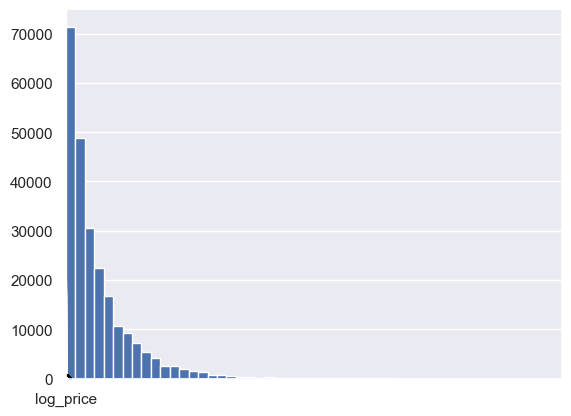

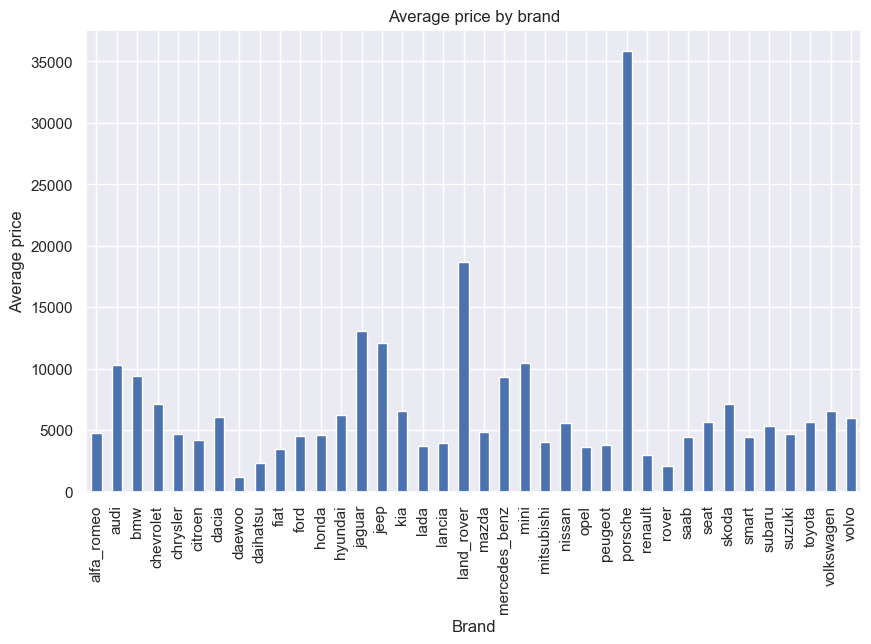

In [32]:
brand_log_price = data.groupby('brand')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Average price')
plt.title('Average price by brand')
plt.show()

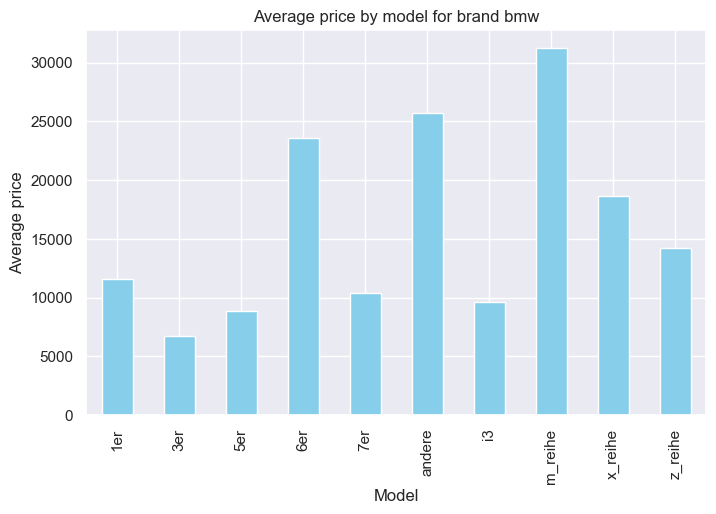

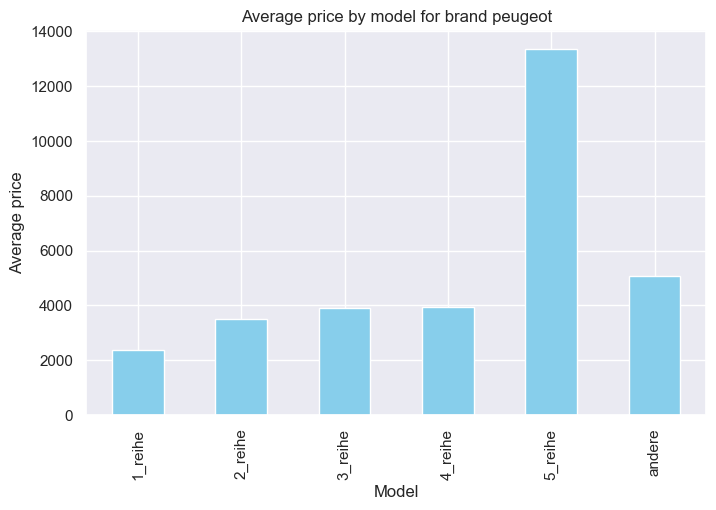

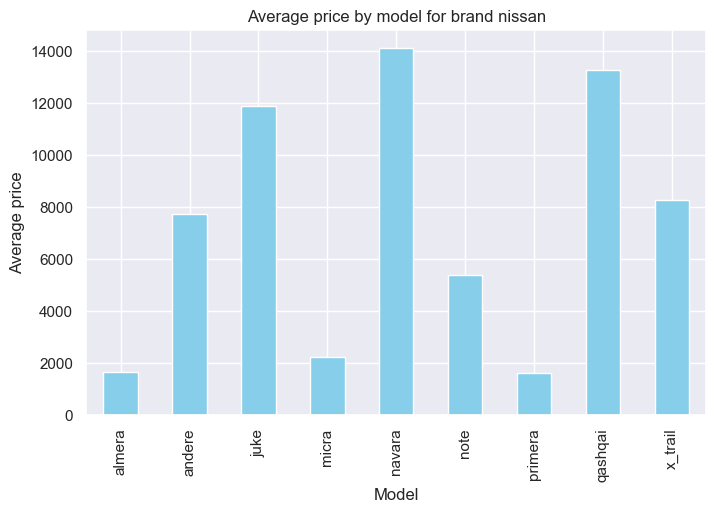

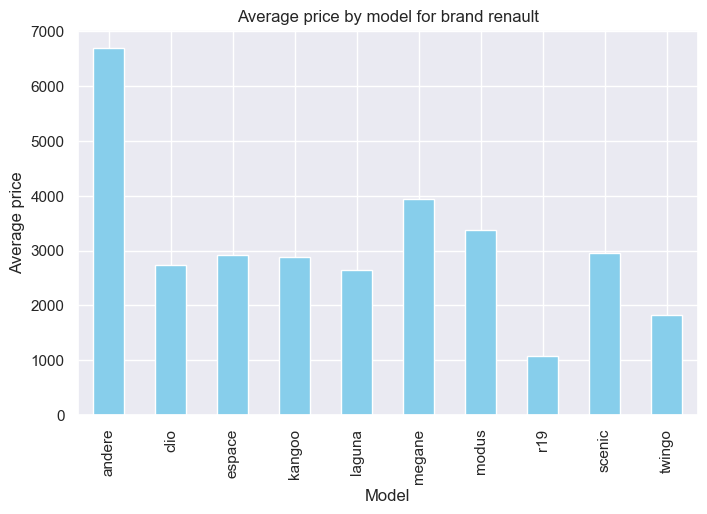

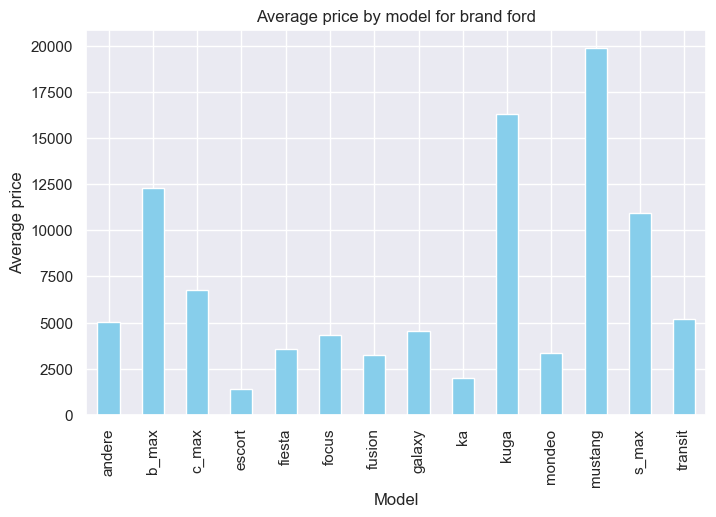

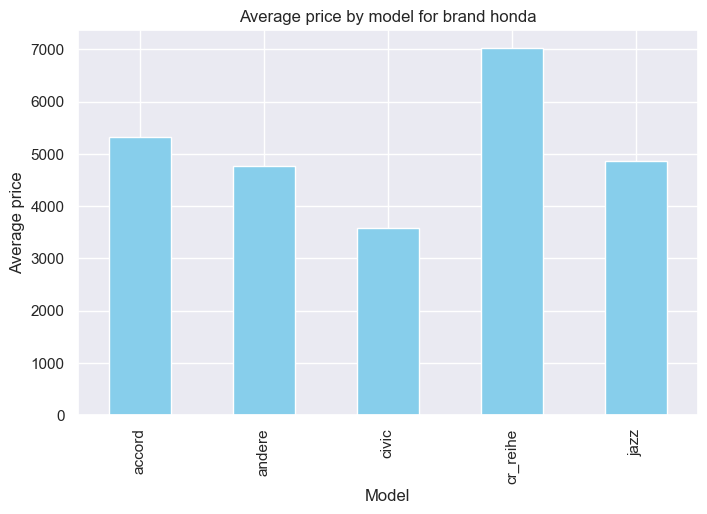

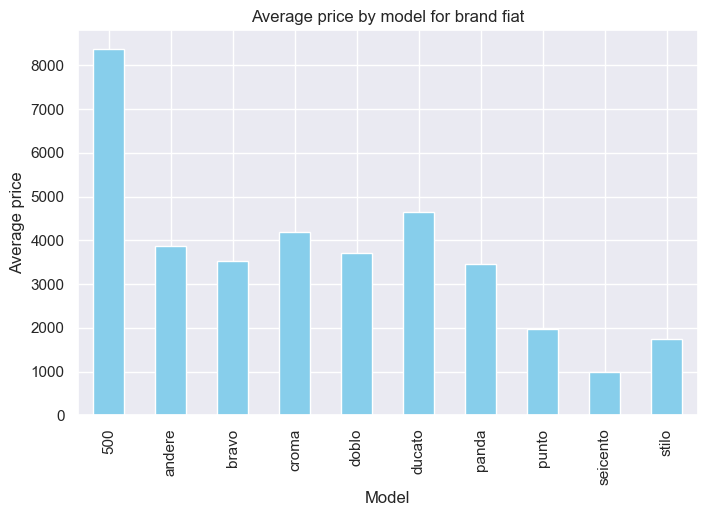

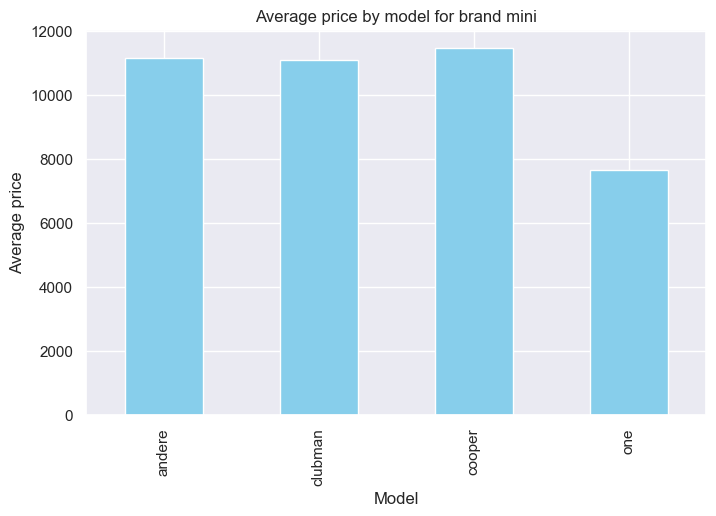

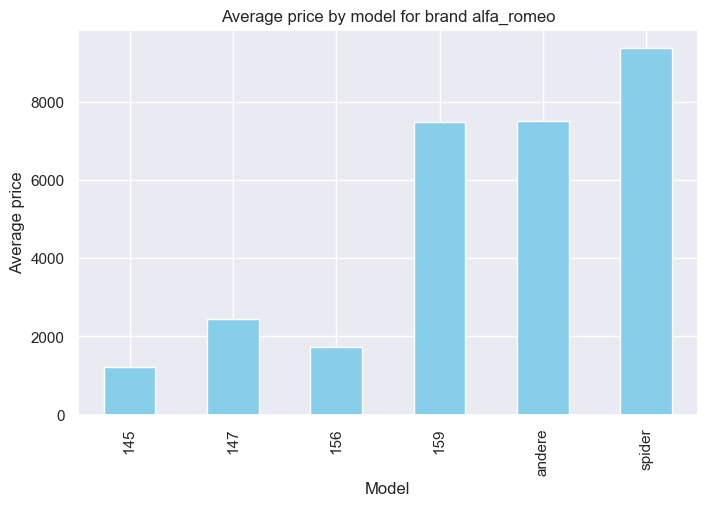

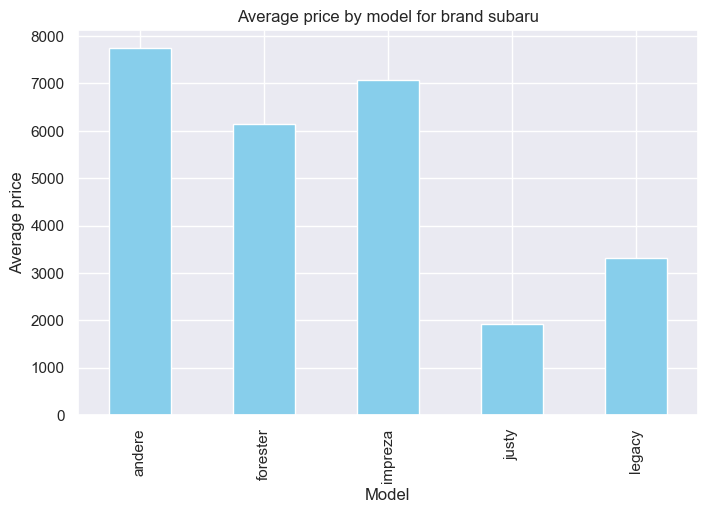

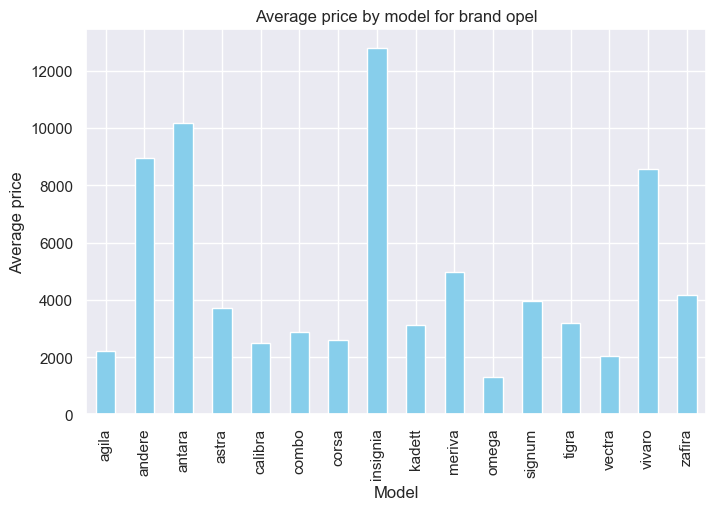

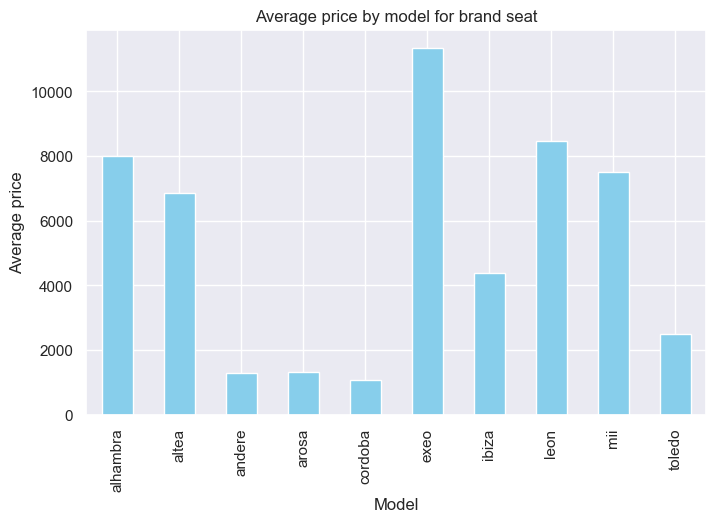

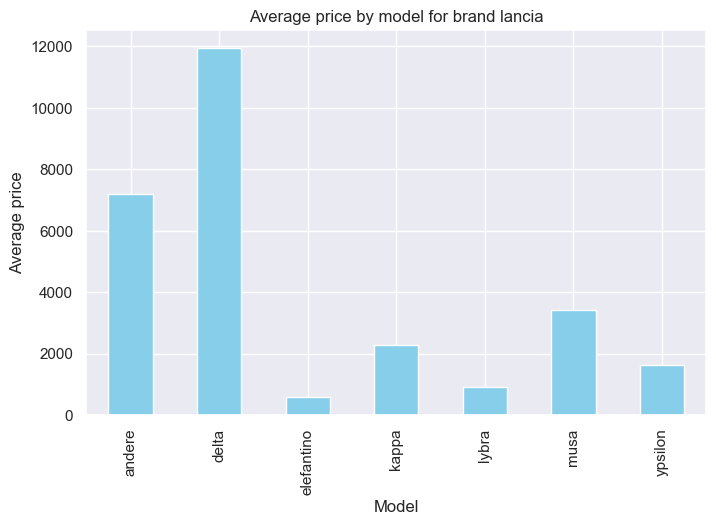

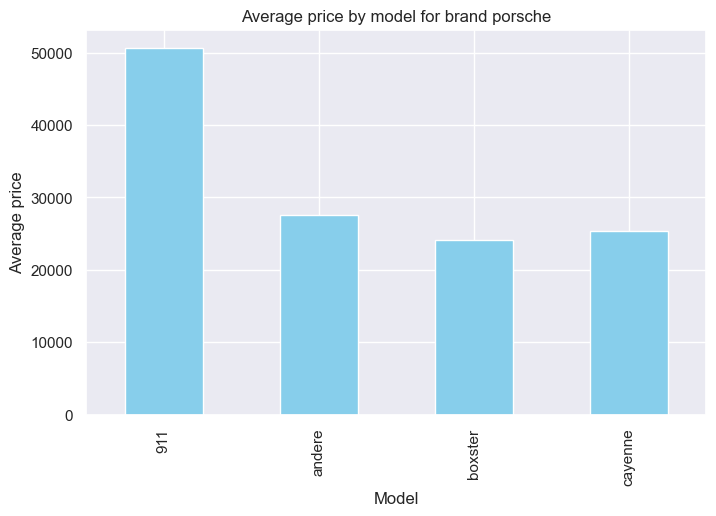

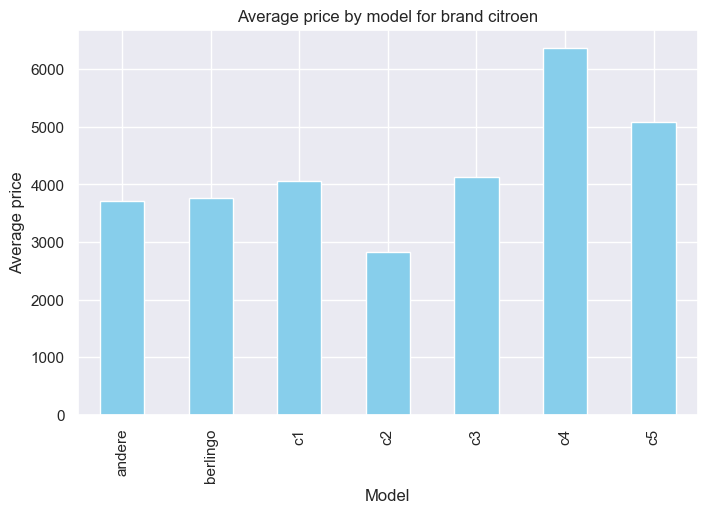

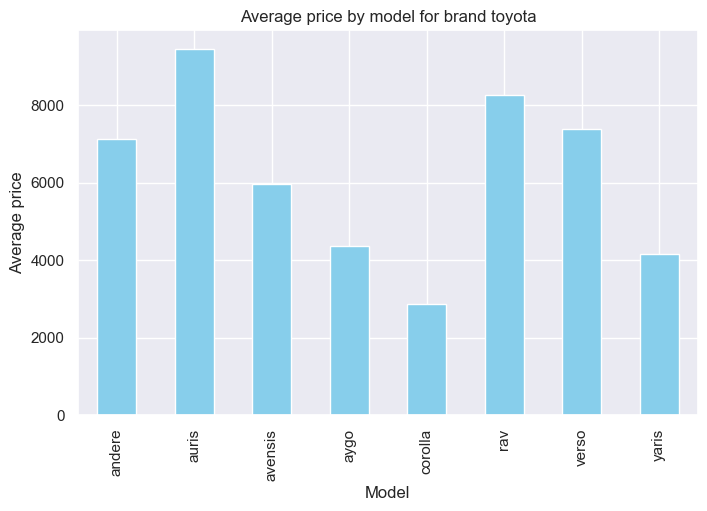

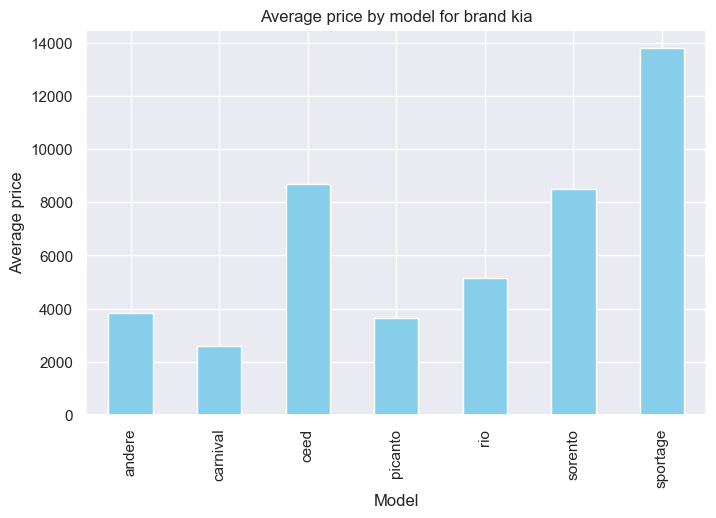

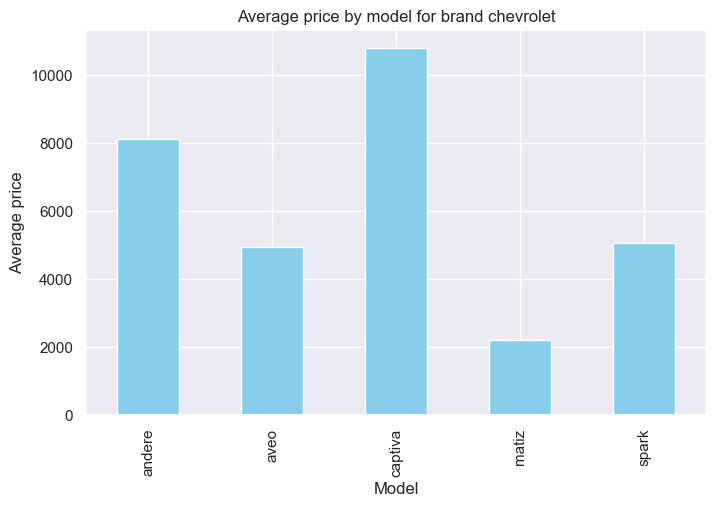

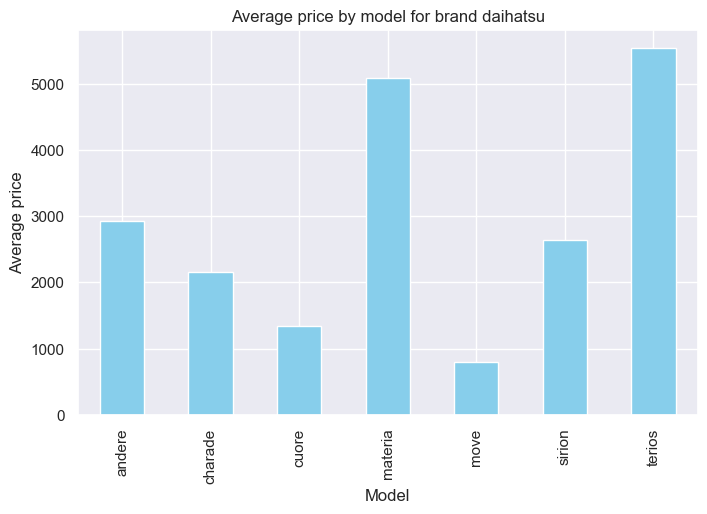

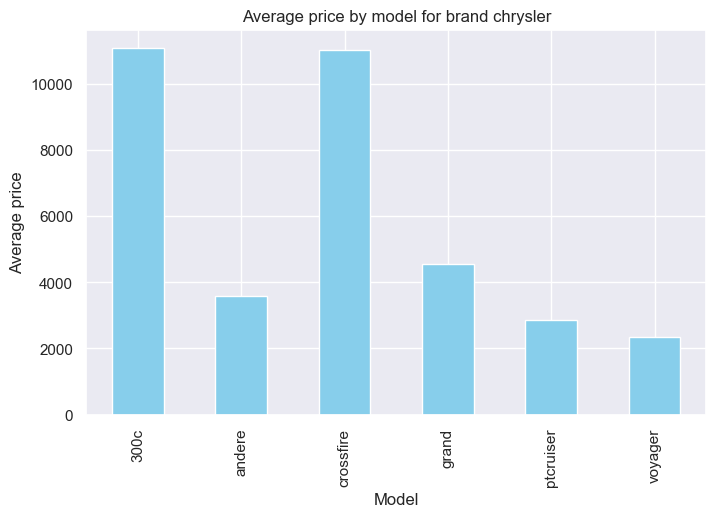

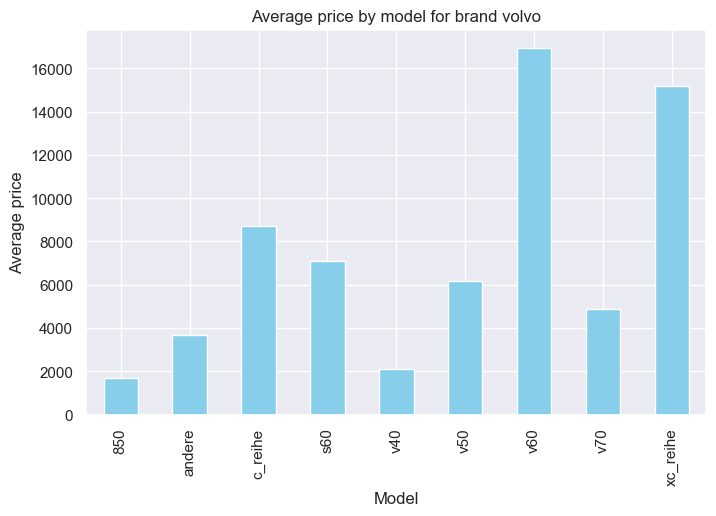

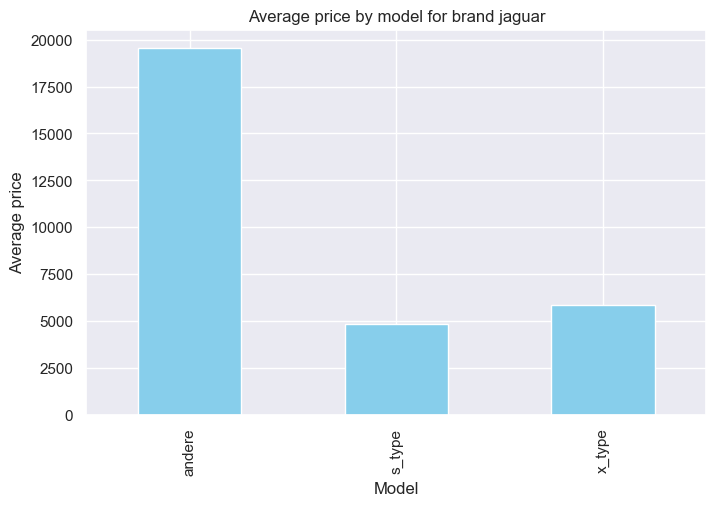

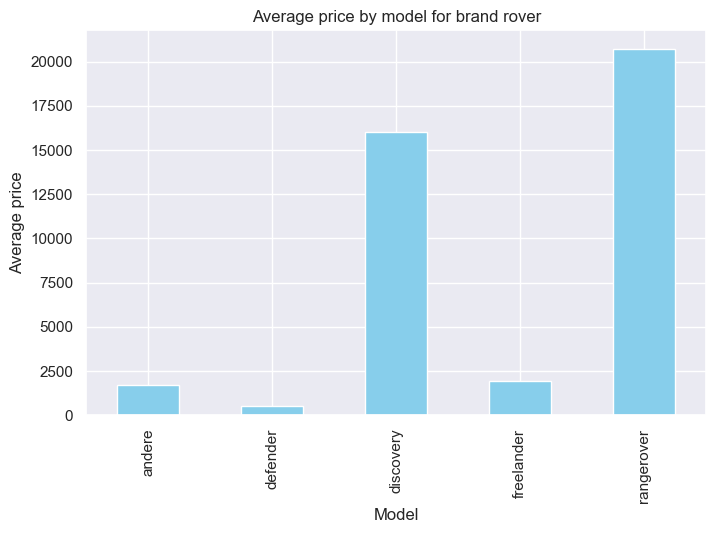

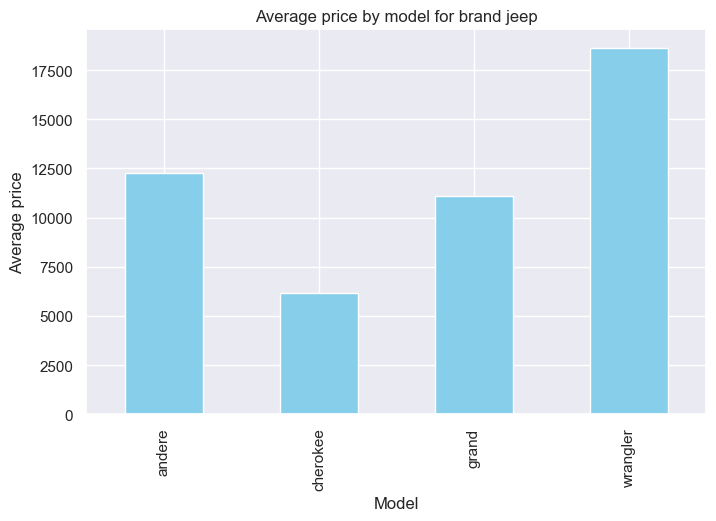

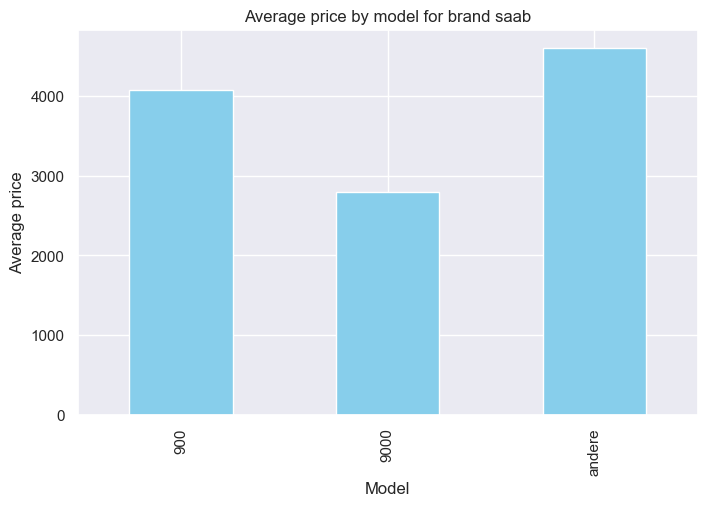

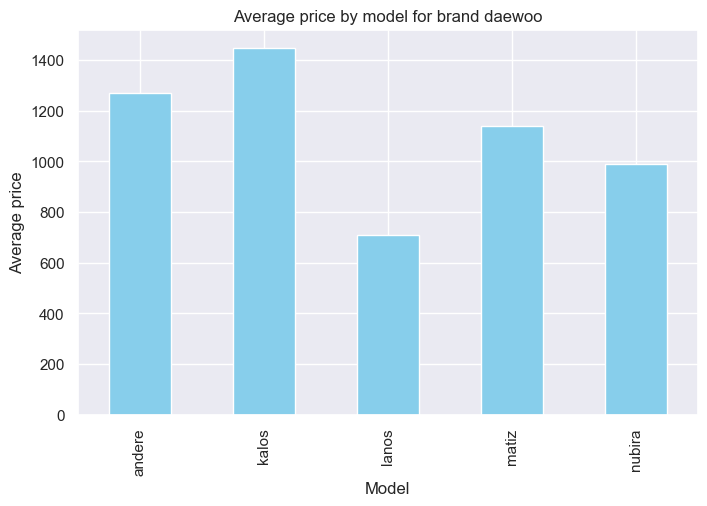

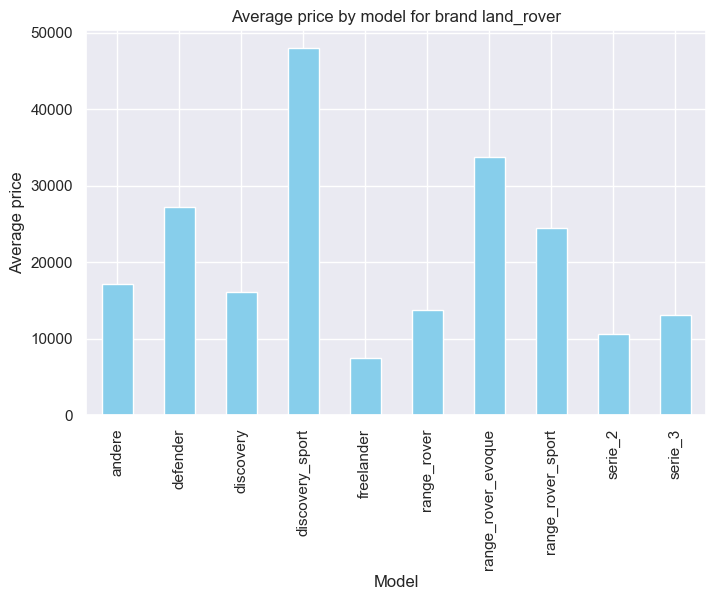

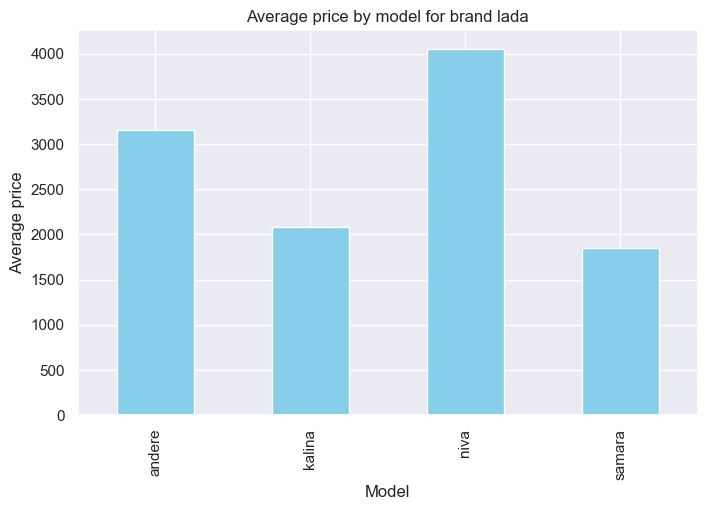

In [33]:
# Группируем данные по 'brand' и 'model' и находим среднее значение 'price' для каждого бренда и модели
brand_model_price = data.groupby(['brand', 'model'])['price'].mean()

# Создаем отдельный график для каждого бренда
brands = data['brand'].unique()
for brand in brands:
    brand_data = brand_model_price.loc[brand]
    plt.figure(figsize=(8, 5))
    brand_data.plot(kind='bar', color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Average price')
    plt.title(f'Average price by model for brand {brand}')
    plt.show()

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

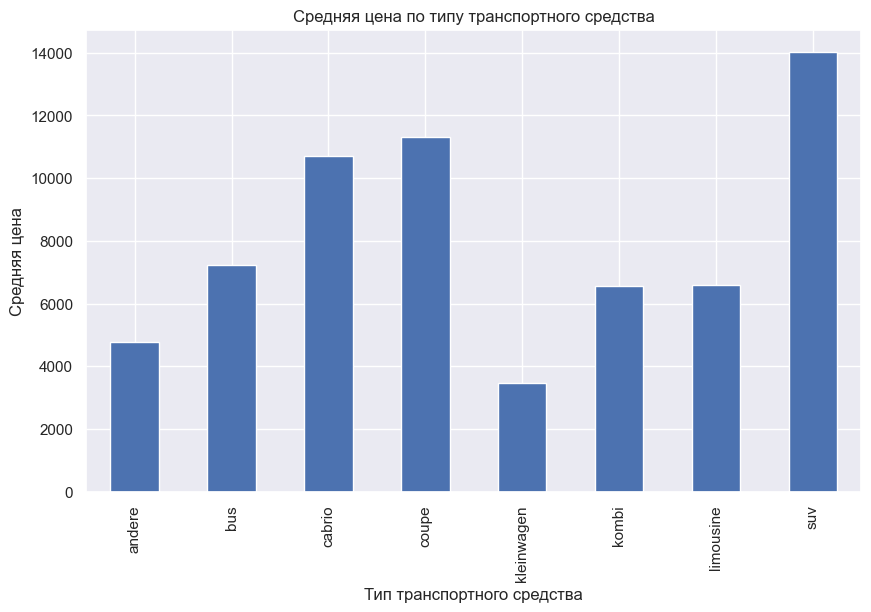

In [34]:
brand_log_price = data.groupby('vehicleType')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Тип транспортного средства')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по типу транспортного средства')
plt.show()

In [35]:
brand_log_price = data.groupby('gearbox')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Тип трансмиссии')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по типу трансмиссии')
plt.show()

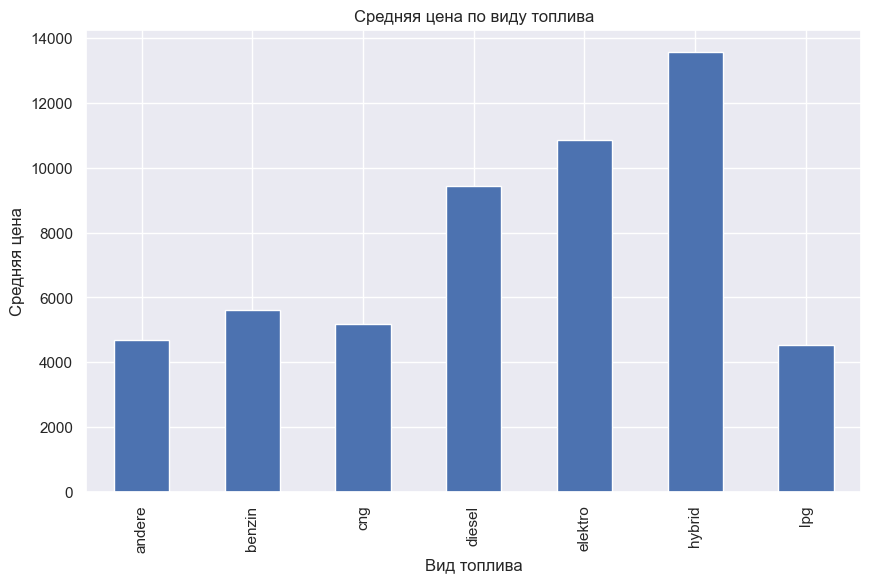

In [36]:
brand_log_price = data.groupby('fuelType')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Вид топлива')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по виду топлива')
plt.show()

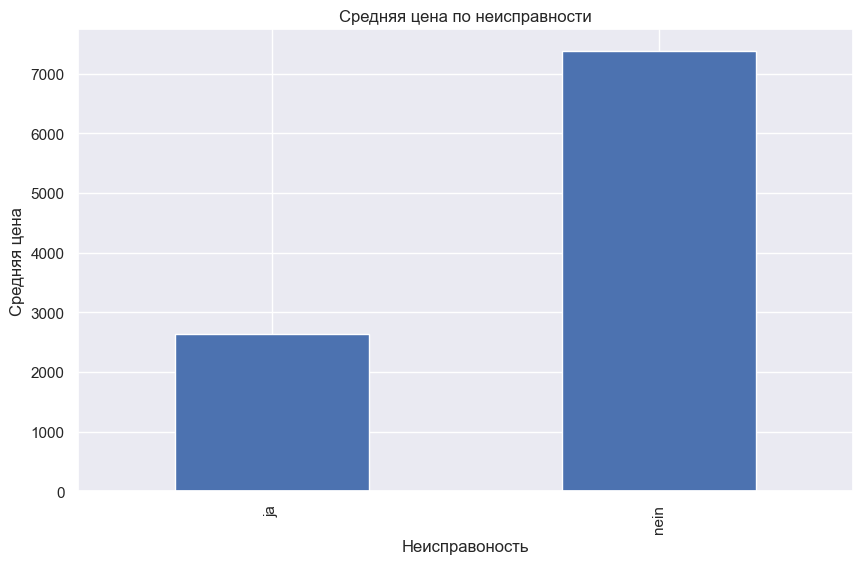

In [37]:
brand_log_price = data.groupby('notRepairedDamage')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Неисправоность')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по неисправности')
plt.show()

In [38]:
# Строим график
plt.figure(figsize=(10, 6))
plt.scatter(data['powerPS'], data['price'], color='blue')
plt.xlabel('Мощность (powerPS)')
plt.ylabel('Цена')
plt.title('Линейная зависимость цены от мощности')
plt.show()

In [39]:
# Строим график
plt.figure(figsize=(10, 6))
plt.scatter(data['kilometer'], data['price'], color='blue')
plt.xlabel('Пробег в км')
plt.ylabel('Цена')
plt.title('Линейная зависимость цены от пробега')
plt.show()

In [40]:
# Строим график
plt.figure(figsize=(10, 6))
plt.scatter(data['autoAgeMonths'], data['price'], color='blue')
plt.xlabel('Возраст авто в месяцах')
plt.ylabel('Цена')
plt.title('Линейная зависимость цены от возраста')
plt.show()

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [41]:
data['brand_model'] = data['brand'].to_string() + '_' + data['model'].to_string()

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Создание объекта StandardScaler
standart_scaler = StandardScaler()

# Применение стандартизации к признаку 'powerPS'
data['powerPS_standardized'] = standart_scaler.fit_transform(data[['powerPS']])

# Создание объекта MinMaxScaler
min_max_scaler = MinMaxScaler()
# Применение нормализации к признаку 'kilometer'
data['kilometer_normalized'] = min_max_scaler.fit_transform(data[['kilometer']])

data['autoAgeMonths_normalized'] = min_max_scaler.fit_transform(data[['autoAgeMonths']])

In [43]:
categorical = ['brand', 'model', 'brand_model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS_standardized', 'kilometer_normalized', 'autoAgeMonths_normalized']
#other = []

In [44]:
#data['bias'] = 1
#other += ['bias']

x = data[categorical + numeric]
y = data['log_price']

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric)
#    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split

# Сначала разделим на обучающую и временную выборки (80% и 20% соответственно)
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

# Затем разделим временную выборку на валидационную и тестовую (10% и 10% от исходного датасета)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# В итоге у нас есть:
# X_train, y_train - обучающая выборка (80%)
# X_val, y_val - валидационная выборка (10%)
# X_test, y_test - тестовая выборка (10%)

## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [47]:
from typing import Dict, List, Tuple
from sklearn.metrics import r2_score

from descents import LossFunction

lambda_values = np.logspace(-4, 1, num=5)

max_iter = 500
tolerance = 1e-4
batch_size = 10
iter_count = 1500


# Преобразование разреженной матрицы в массив NumPy
X_train_array = X_train.toarray()
Y_train_array = y_train.values

# Валидационная выборка
X_val_array = X_val.toarray()
y_val_array = y_val.values

def print_params(lr, last_train_loss, val_loss, r2_train, r2_val, iter_count, mu: float = None, batch_sizes: int = None):
    """
    Выводит в консоль информацию о лучших параметрах модели.

    Этот метод предназначен для вывода значений ключевых метрик и параметров после процесса обучения модели, 
    включая скорость обучения, ошибку на тренировочной и валидационной выборках, а также коэффициент детерминации R^2 
    на тренировочной и валидационной выборках. Параметр mu относится к коэффициенту регуляризации, а batch_sizes — к размеру батча.
    """

    base_message = (
        f'Параметры:\n'
        f'lambda_ = {lr} \n'
        f'Ошибка на тренировочной выборке = {last_train_loss} \n'
        f'Ошибка на валидационной выборке = {val_loss} \n'
        f'R2_train = {r2_train} \n'
        f'R2_val = {r2_val} \n'
        f'Iter_count = {iter_count}\n'
    )

    if mu is not None:
        base_message += f'mu = {mu} \n'

    if batch_sizes is not None:
        base_message += f'Batch_size = {batch_sizes} \n'
    
    print(base_message)


def get_train_result(loss_function: LossFunction = LossFunction.MSE ,lr: float = 0.01, descent_name: str = 'adam', descent_reg: bool = False, isBasis: bool = True, mu: float = 0.1,  batch_size: int = None, tolerance: float = 1e-4, 
                     max_iter: int = 500, min_loss: float = 0) -> Tuple[float, float, float, float, List[float]]:
    """
    Обучает модель линейной регрессии, используя заданную конфигурацию градиентного спуска, и возвращает результаты.

    Parameters:
    ----------
    lr : float, optional
        Скорость обучения (learning rate). По умолчанию равно 0.01.
    descent_name : str, optional
        Название метода градиентного спуска. Поддерживает 'adam' и 'stochastic'. По умолчанию 'adam'.
    batch_size : int, optional
        Размер батча для стохастического градиентного спуска. Только для 'stochastic'. По умолчанию None.
    tolerance : float, optional
        Критерий остановки для квадрата евклидова нормы разности весов. По умолчанию равен 1e-4.
    max_iter : int, optional
        Максимальное количество итераций обучения. По умолчанию равно 500.

    Returns:
    -------
    tuple
        Возвращает кортеж, содержащий следующие элементы:
        - r2_train (float): Коэффициент детерминации R^2 на обучающем наборе данных.
        - r2_val (float): Коэффициент детерминации R^2 на валидационном наборе данных.
        - last_train_loss (float): Значение функции потерь на последней итерации обучения.
        - val_loss (float): Значение функции потерь на валидационном наборе данных.
        - loss_history (list[float]): История значений функции потерь в процессе обучения.

    Примечания:
    ----------
    - Предполагается, что `X_train_array`, `Y_train_array`, `X_val_array`, `y_val_array` 
      являются глобально определенными переменными и содержат данные для обучения и валидации модели.
    - Метод `fit` модели `LinearRegression` использует `descent_config` для конфигурации выбранного метода градиентного спуска.
    """
    
    if descent_reg:
        if descent_name == 'stochastic':
            descent_config = {
                    'descent_name': descent_name,
                    'regularized': descent_reg, 
                    'kwargs': {
                        'dimension': X_train.shape[1],                    
                        'batch_size': batch_size,
                        'lambda_' : lr,                    
                        'mu': mu,
                        'isBasis': isBasis
                    }
                }
        else:
            descent_config = {
                        'descent_name': descent_name,
                        'regularized': descent_reg, 
                        'kwargs': {
                            'dimension': X_train.shape[1],                                           
                            'lambda_' : lr,                        
                            'mu': mu,
                            'isBasis': isBasis
                        }
                    }
    else:
        if descent_name == 'stochastic':
            descent_config = {
                    'descent_name': descent_name,
                    'regularized': descent_reg, 
                    'kwargs': {
                        'dimension': X_train.shape[1],                    
                        'batch_size': batch_size,
                        'lambda_' : lr,
                        'isBasis': isBasis,
                        'loss_function': loss_function
                    }
                }
        else:
            descent_config = {
                        'descent_name': descent_name,
                        'regularized': descent_reg, 
                        'kwargs': {
                            'dimension': X_train.shape[1],                                           
                            'lambda_' : lr,
                            'isBasis': isBasis,
                            'loss_function': loss_function
                        }
                    }

    regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter,
            min_loss=min_loss
        )

    regression.fit(X_train_array, Y_train_array)

    r2_train = r2_score(Y_train_array, regression.predict(X_train_array))
    r2_val = r2_score(y_val, regression.predict(X_val_array))
    last_train_loss = regression.loss_history[-1]
    val_loss = regression.calc_loss(X_val_array, y_val_array)
    loss_history = regression.loss_history    
    
    return r2_train, r2_val, last_train_loss, val_loss, loss_history

def start_lr_seach(lambda_values, descent_name: str = 'adam', descent_reg: bool = False, isBasis: bool = True, batch_size: int = None, tolerance: float = 1e-4, 
                   max_iter: int = 300, min_loss: float = 0) -> Tuple[List[Dict[str, List[float]]], List[List[float]]]:
    """
    Выполняет поиск по сетке скоростей обучения (learning rates) для оценки их влияния на обучение модели.

    Parameters:
    ----------
    lambda_values : iterable
        Перечислимый объект (например, список или массив), содержащий значения скорости обучения для тестирования.
    descent_name : str, optional
        Название метода градиентного спуска. Поддерживаются 'adam' и 'stochastic'. По умолчанию 'adam'.
    batch_size : int, optional
        Размер батча для стохастического градиентного спуска. Только если descent_name='stochastic'. По умолчанию None.
    tolerance : float, optional
        Критерий остановки для квадрата евклидова нормы разности весов. По умолчанию равен 1e-4.
    max_iter : int, optional
        Максимальное количество итераций обучения. По умолчанию равно 500.

    Returns:
    -------
    tuple
        Возвращает кортеж из двух элементов:
        - Первый элемент (list of dict): Список словарей, где каждый словарь содержит пару ключей 'lr' (значение скорости обучения) 
          и 'loss_history' (список значений функции потерь для данного значения скорости обучения).
        - Второй элемент (list of list): Список списков, где каждый внутренний список содержит результаты для одного значения 
          скорости обучения, включая само значение скорости обучения, значение функции потерь на последней итерации обучения, 
          значение функции потерь на валидационном наборе данных, коэффициенты детерминации R^2 на обучающем и валидационном 
          наборах данных, и максимальное количество итераций.

    Пример использования:
    --------------------
    lambda_values = [0.001, 0.01, 0.1]
    list_of_dicts, results = start_lr_search(lambda_values, descent_name='adam', max_iter=500)
    
    # Далее, вы можете анализировать 'list_of_dicts' и 'results' для определения оптимального значения скорости обучения.
    """

    result = []
    lrs = []
    loss_histories = []

    for lr in lambda_values:
        r2_train, r2_val, last_train_loss, val_loss, loss_history = get_train_result(lr=lr, descent_name=descent_name, descent_reg=descent_reg, 
                                                                                     isBasis=isBasis,
                                                                                     batch_size=batch_size, tolerance=tolerance, 
                                                                                     max_iter=max_iter, min_loss=min_loss)  

        iter_count = len(loss_history)
        result.append([lr, last_train_loss, val_loss, r2_train, r2_val, iter_count])  
        lrs.append(lr)
        loss_histories.append(loss_history)

        print_params(lr, last_train_loss, val_loss, r2_train, r2_val, iter_count)

    list_of_dictionaries = [{"lr": lr, "loss_history": loss_history} for lr, loss_history in zip(lrs, loss_histories)]

    df_result = pd.DataFrame(result)
    df_result.columns = ['Learning_Rate', 'Error_Trein', 'Error_Val', 'R2_Train', 'R2_Val', 'Iter_count']

    return list_of_dictionaries, df_result

def start_lr_and_mu_seach(lambda_values, mu_valuse, descent_name: str = 'adam', descent_reg: bool = False, isBasis: bool = True, 
                          batch_size: int = None, tolerance: float = 1e-4, max_iter: int = 300) -> Tuple[List[Dict[str, List[float]]], List[List[float]]]:
    """
    Выполняет поиск по сетке скоростей обучения (learning rates) для оценки их влияния на обучение модели.

    Parameters:
    ----------
    lambda_values : iterable
        Перечислимый объект (например, список или массив), содержащий значения скорости обучения для тестирования.
    descent_name : str, optional
        Название метода градиентного спуска. Поддерживаются 'adam' и 'stochastic'. По умолчанию 'adam'.
    batch_size : int, optional
        Размер батча для стохастического градиентного спуска. Только если descent_name='stochastic'. По умолчанию None.
    tolerance : float, optional
        Критерий остановки для квадрата евклидова нормы разности весов. По умолчанию равен 1e-4.
    max_iter : int, optional
        Максимальное количество итераций обучения. По умолчанию равно 500.

    Returns:
    -------
    tuple
        Возвращает кортеж из двух элементов:
        - Первый элемент (list of dict): Список словарей, где каждый словарь содержит пару ключей 'lr' (значение скорости обучения) 
          и 'loss_history' (список значений функции потерь для данного значения скорости обучения).
        - Второй элемент (list of list): Список списков, где каждый внутренний список содержит результаты для одного значения 
          скорости обучения, включая само значение скорости обучения, значение функции потерь на последней итерации обучения, 
          значение функции потерь на валидационном наборе данных, коэффициенты детерминации R^2 на обучающем и валидационном 
          наборах данных, и максимальное количество итераций.

    Пример использования:
    --------------------
    lambda_values = [0.001, 0.01, 0.1]
    list_of_dicts, results = start_lr_search(lambda_values, descent_name='adam', max_iter=500)
    
    # Далее, вы можете анализировать 'list_of_dicts' и 'results' для определения оптимального значения скорости обучения.
    """

    result = []
    lrs = []
    mus = []
    loss_histories = []

    for lr in lambda_values:
        for mu in mu_valuse:

            r2_train, r2_val, last_train_loss, val_loss, loss_history = get_train_result(lr=lr, descent_name=descent_name, descent_reg=descent_reg, isBasis=isBasis,
                                                                                        mu=mu, batch_size=batch_size, tolerance=tolerance, max_iter=max_iter)  

            result.append([lr, mu, last_train_loss, val_loss, r2_train, r2_val, max_iter])  
            lrs.append(lr)
            loss_histories.append(loss_history)
            mus.append(mu)
            list_of_dictionaries = [{"lr": lr, "mu": mu, "loss_history": loss_history} for lr, mu, loss_history in zip(lrs, mus, loss_histories)]
            iter_count = len(loss_history)
            
            print_params(lr, last_train_loss, val_loss, r2_train, r2_val, iter_count)

            df_result = pd.DataFrame(result)
            df_result.columns = ['Learning_Rate', 'Mu', 'Error_Trein', 'Error_Val', 'R2_Train', 'R2_Val', 'Iter_count']

    return list_of_dictionaries, df_result 

### Анализ сходимости Full градиентного спуска

В ходе продолжительных испытаний на некоторых параметрах lr сходимость не достигается за разумное время. По этому ограничимся 500 эпохами, и значением в 0.35 для параметра ошибки модели. Если за 500 итераций значение выше порогового, то будем сяитать что сходимость не достигается за разумное время и эти параметры не могут быть оптемальными. Если ошибка меньше 0.35 то считаем что сходимость достигнута.

In [48]:
#
full_lr_loss_history, full_df = start_lr_seach(lambda_values=lambda_values, descent_name='full', min_loss=0.35)

# Строим график зависимости lr от error

def plot_err_vs_lr(df: pd.DataFrame, descent_name: str = 'full'):

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Learning_Rate', y='Error_Val', data=df, label='Validation Error')
    sns.lineplot(x='Learning_Rate', y='Error_Trein', data=df, label='Training Error')
    plt.xlabel('Learning Rate')
    plt.ylabel('Error')
    title = descent_name + ' Error vs Learning Rate'
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_err_vs_lr(full_df, descent_name='Full')

14.755987966359402
14.736465477244698
14.716973805754265
14.697512900210178
14.678082709023203
14.658683180692634
14.639314263806137
14.619975907039587
14.600668059156948
14.581390669010089
14.56214368553864
14.542927057769852
14.523740734818421
14.504584665886373
14.485458800262872
14.466363087324105
14.4472974765331
14.428261917439608
14.409256359679928
14.390280752976755
14.371335047139057
14.352419192061912
14.333533137726336
14.314676834199169
14.295850231632917
14.277053280265578
14.258285930420545
14.239548132506407
14.220839837016833
14.202160994530411
14.183511555710497
14.164891471305099
14.146300692146685
14.127739169152061
14.109206853322247
14.090703695742278
14.072229647581105
14.053784660091436
14.035368684609583
14.016981672555314
13.99862357543174
13.980294344825124
13.961993932404777
13.943722289922892
13.92547936921441
13.907265122196879
13.889079500870299
13.87092245731698
13.852793943701421
13.834693912270147
13.816622315351575
13.798579105355863
13.780564234774786

In [49]:
pd.set_option('display.float_format', lambda d: '%.5f' % d)
full_df

Learning_Rate  Error_Trein    Error_Val      R2_Train        R2_Val  \
0        0.00010     10.10230     10.05672      -7.28720      -7.09531   
1        0.00178      0.78587      0.79192       0.35533       0.36254   
2        0.03162      0.35402      0.35722       0.70959       0.71245   
3        0.56234   3721.42347   3716.42637   -3051.78784   -2990.59309   
4       10.00000 136837.89338 136592.96829 -112250.95429 -109951.55639   

   Iter_count  
0         300  
1         300  
2         300  
3           3  
4           2

In [50]:
# Создаем отдельный график для каждого значения lr
def plot_loss_history(loss_history_by_descent, descent_name: str = 'adam'):

    for dictionary in loss_history_by_descent:
        lr = dictionary["lr"]
        loss_history = dictionary["loss_history"]
        
        # Создаем новый график
        plt.figure(figsize=(8, 4))
        plt.plot(loss_history, marker='o', linestyle='-')
        
        # Добавляем заголовок, включающий значение lr
        plt.title(f'{descent_name} loss history for Learning Rate : {lr}')
        
        # Называем оси
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        
        # Отображаем график
        plt.show()

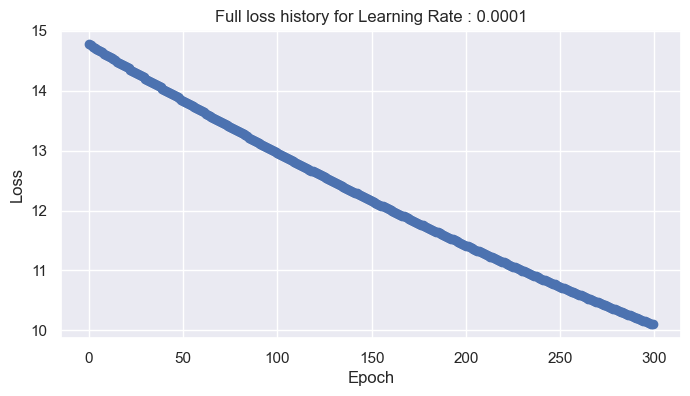

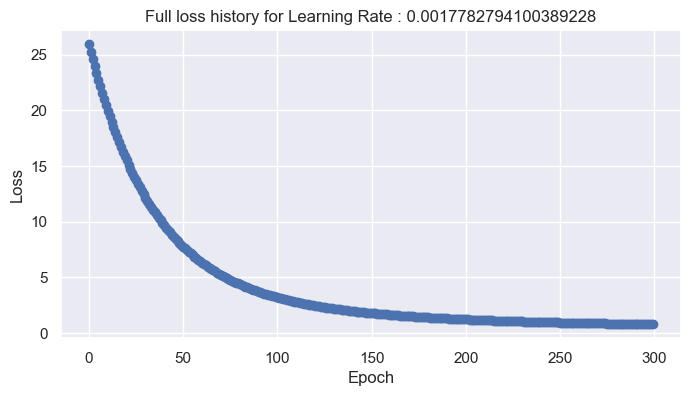

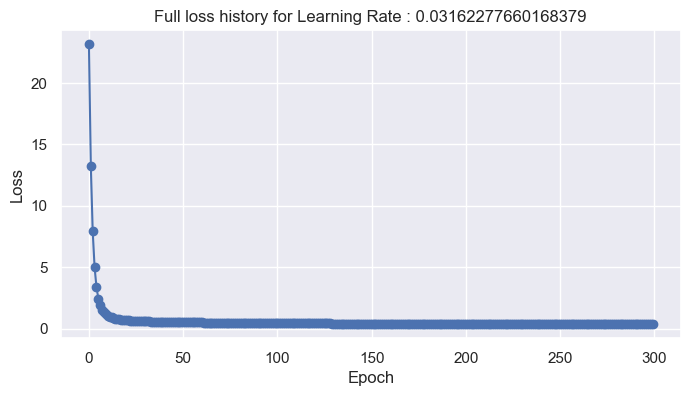

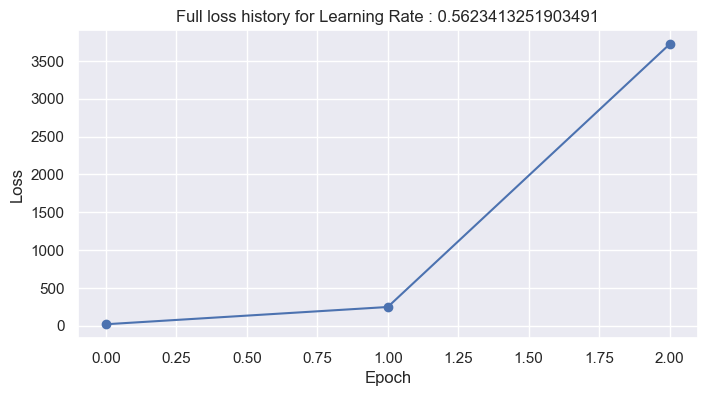

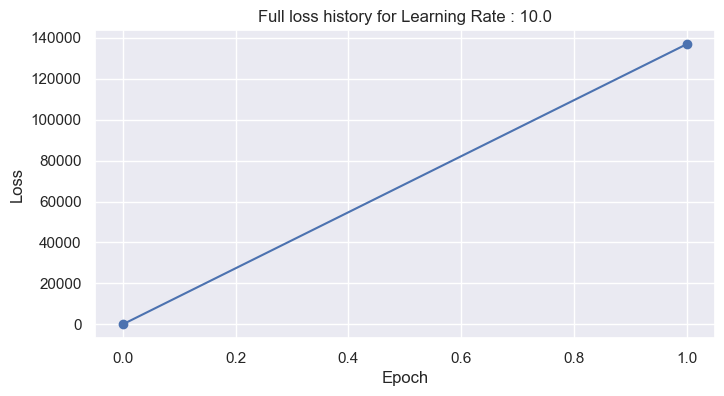

In [51]:
plot_loss_history(loss_history_by_descent=full_lr_loss_history, descent_name='Full')

Из графиков видно, что оптемальное значение lr находится где то в районе 0.06. Попробуем подобрать его в ручную, как и количество необходимых итераций для более глубокой сходимости.

In [52]:
full_lr = 0.03162
full_r2_train, full_r2_val, full_last_train_loss, full_val_loss, full_loss_history = get_train_result(lr=full_lr, descent_name='full', max_iter=iter_count, min_loss=0.26)

5.515482086693028
3.634132825446001
2.570553352589204
1.9501150502187063
1.5734450626491885
1.3337471156162692
1.1732576910624926
1.0602888278894076
0.9771047974076361
0.9135038959863016
0.8634075623262845
0.8230371832373132
0.7899310878558745
0.7624077675636635
0.7392673856339292
0.7196215819413935
0.7027931890828256
0.6882547103573716
0.675588811163338
0.6644617150064119
0.6546044678614105
0.6457992215862275
0.637868874282974
0.6306690601685588
0.6240818505569803
0.618010741813478
0.6123766352597302
0.6071145953012986
0.6021712256993436
0.5975025409951858
0.5930722368203862
0.5888502827553028
0.5848117766624441
0.5809360113396178
0.5772057137730734
0.5736064248104181
0.5701259931360303
0.5667541623276974
0.5634822337378614
0.5603027911592058
0.5572094758467601
0.554196802592377
0.5512600092746835
0.5483949337130313
0.5455979127977862
0.5428656998004552
0.5401953965252482
0.5375843975810348
0.5350303445554204
0.5325310882821819
0.5300846577269057
0.5276892342874712
0.5253431305274723


In [53]:
def plot_optimal_loss_history(loss_history):
    # Выводим историю ошибок на график
    plt.figure(figsize=(8, 4))
    plt.plot(loss_history)

    plt.figure(figsize=(8, 4))    
    filtered_regression_history= [val for val in loss_history if val < 1]
    # Создаем график для отфильтрованных значений
    plt.plot(filtered_regression_history)

plot_optimal_loss_history(full_loss_history)

### Анализ StochasticDescent

In [54]:
stochastic_lr_loss_history, stochastic_df = start_lr_seach(lambda_values=lambda_values, descent_name='stochastic', batch_size=batch_size, min_loss=0.35)

23.046785172632497
23.01959444410215
22.985075473917068
22.947188056722506
22.907578981117446
22.86726619098733
22.831400153462592
22.798359167974642
22.759349712814668
22.711144644024827
22.67931674321927
22.643619066426627
22.613251208785744
22.56979944169541
22.531662997074143
22.504536397882244
22.463367489262485
22.427931698271784
22.396903554538284
22.375389750605336
22.3408132581619
22.30710596949291
22.267057225932668
22.232492877784964
22.207837890072938
22.174146279201164
22.138837546082474
22.104599555185207
22.070117796374443
22.03341457946207
22.00249668311271
21.96337400088085
21.933520863975666
21.90906044379367
21.881129396368937
21.844840332445045
21.821365233229255
21.785896281506147
21.742555000202117
21.72023247313079
21.691500546458773
21.666944427069865
21.634029161681102
21.600145205704273
21.57012009520608
21.543484765691836
21.501135749271832
21.46786953068036
21.444427175051302
21.419073212532464
21.38717074189197
21.34913295838871
21.315243879218936
21.291085

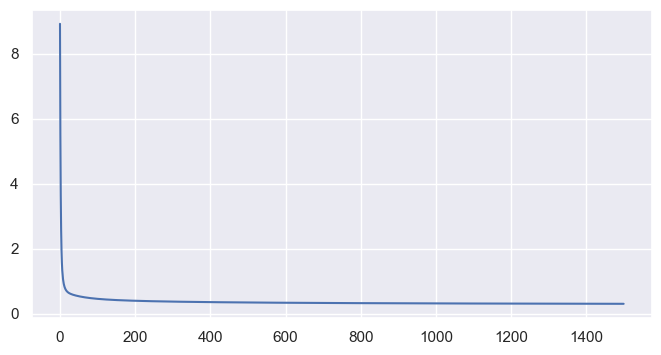

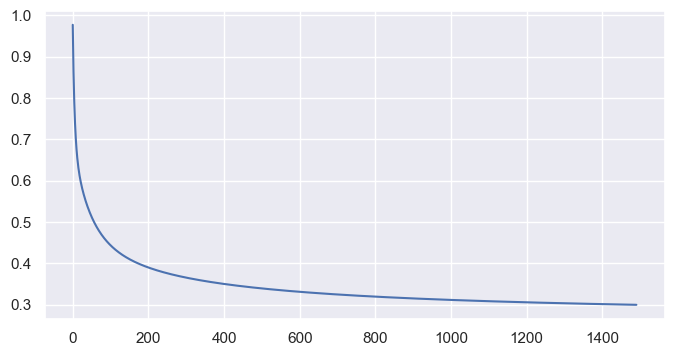

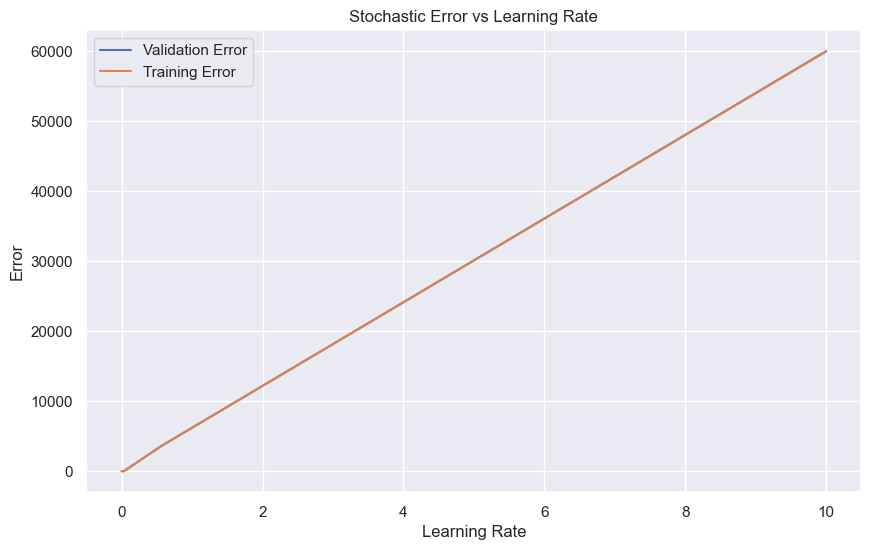

In [55]:
plot_err_vs_lr(stochastic_df, descent_name='Stochastic')

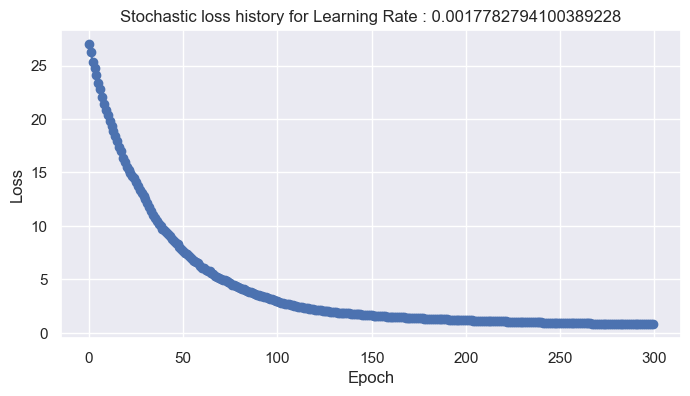

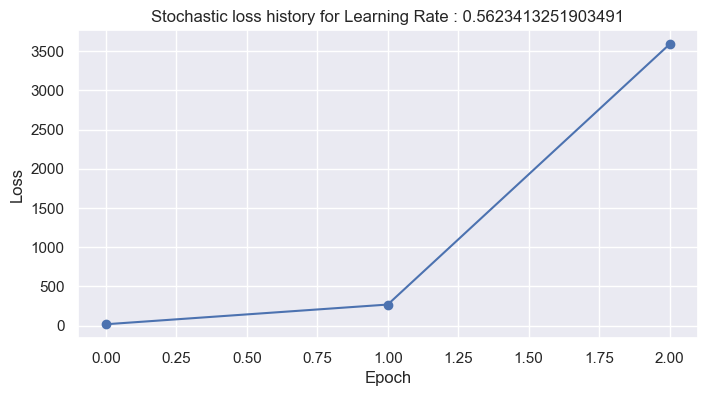

In [56]:
plot_loss_history(loss_history_by_descent=stochastic_lr_loss_history, descent_name='Stochastic')

In [57]:
stochastic_df

Learning_Rate  Error_Trein   Error_Val     R2_Train       R2_Val  \
0        0.00010     14.67006    14.61308    -11.03426    -10.76302   
1        0.00178      0.80583     0.81165      0.33895      0.34665   
2        0.03162      0.38309     0.38845      0.68574      0.68731   
3        0.56234   3587.07510  3586.31922  -2941.57811  -2885.86139   
4       10.00000  59943.33948 59993.53258 -49172.19930 -48291.69293   

   Iter_count  
0         300  
1         300  
2         300  
3           3  
4           2

In [58]:
stochastic_lr = 0.03162
stochastic_r2_train, stochastic_r2_val, stochastic_last_train_loss, stochastic_val_loss, stochastic_loss_history = get_train_result(lr=stochastic_lr, descent_name='stochastic', max_iter=iter_count, batch_size=batch_size, min_loss=0.26)

17.207487599454698
9.609754090992514
6.622427450638875
4.436646967347055
3.801146994616669
2.795839092601366
2.5322207689141925
1.942423272349885
1.719641393978762
1.4920459973426334
1.3802124211291456
1.3332864645789644
1.2468222892826997
1.1729819147403722
1.0739809821350017
0.9621959962517503
0.8092698520448445
0.7753352802841139
0.7508953741482773
0.7461668127349795
0.7429688199308412
0.7052769168292699
0.6749237890371882
0.644001691102015
0.6323452596384016
0.6318796134206458
0.658305935707541
0.5869867561757219
0.569431971692149
0.556837862240849
0.5581791479338999
0.5522868812130081
0.5553329596427058
0.5379917423301047
0.5387275305574518
0.5334813641536718
0.5336628151266711
0.5448360127292273
0.5505241998755991
0.5294908395189037
0.5152767677468433
0.5098825429056353
0.5041121491935736
0.5015195464492431
0.5006818036501861
0.4927223353809393
0.4947518860250675
0.4930554824969428
0.49072987302517707
0.4802096845920931
0.4788444415416137
0.47230127464707694
0.4728587430871678
0.

In [59]:
print_params(stochastic_lr, stochastic_last_train_loss, stochastic_val_loss, stochastic_r2_train, stochastic_r2_val, len(stochastic_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.3121472042966535 
Ошибка на валидационной выборке = 0.3118118318148478 
R2_train = 0.7439369107372369 
R2_val = 0.7490023941356666 
Iter_count = 1500



In [60]:
plot_optimal_loss_history(stochastic_loss_history)

### Momentum

In [61]:
momentum_lr_loss_history, momentum_df = start_lr_seach(lambda_values=lambda_values, descent_name='momentum')

13.237065602490187
13.199884520090208
13.14699400201152
13.080117764091266
13.000839499778769
12.910610131911705
12.810755538394536
12.70248449469245
12.58689663837559
12.464990310646066
12.337670169231869
12.20575449818393
12.069982164554453
11.931019190965765
11.78946492775751
11.645857819589708
11.500680769780796
11.354366111844485
11.207300202118162
11.059827650423466
10.912255207668023
10.764855330429588
10.617869443054953
10.471510917812566
10.325967793283816
10.181405250562879
10.037967866036118
9.895781658591032
9.754955948108746
9.615585041059811
9.477749757978753
9.341518816558677
9.206950083099269
9.074091704070401
8.94298312862636
8.813656032028238
8.686135149105757
8.560439026116791
8.436580698642546
8.314568302487695
8.19440562393669
8.076092595146703
7.959625739933453
7.844998574724242
7.732201969011432
7.621224469236245
7.512052589664178
7.404671073477521
7.299063127004575
7.195210629726749
7.093094322451917
6.992693975812715
6.893988541040124
6.796956284773838
6.701574

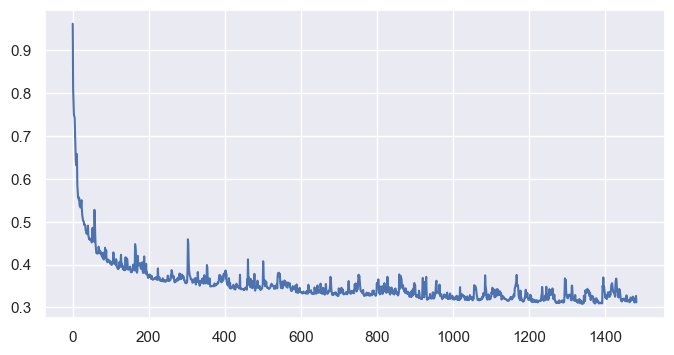

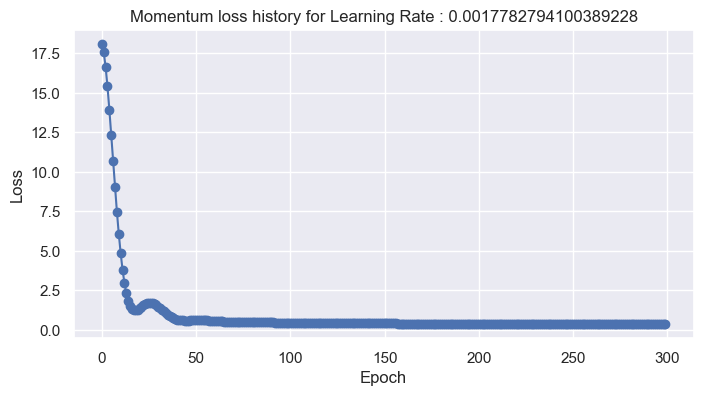

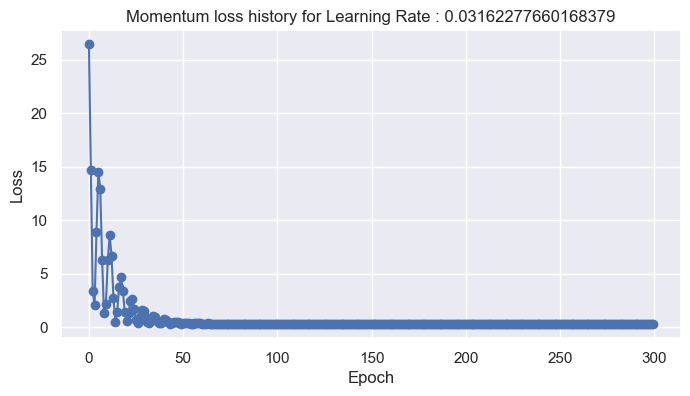

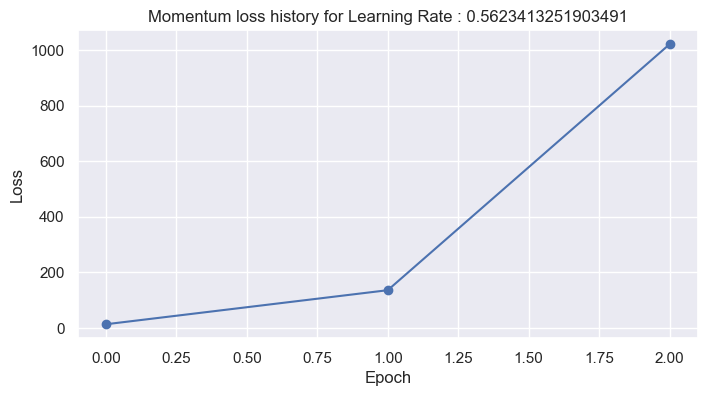

In [62]:
plot_loss_history(momentum_lr_loss_history, 'Momentum')

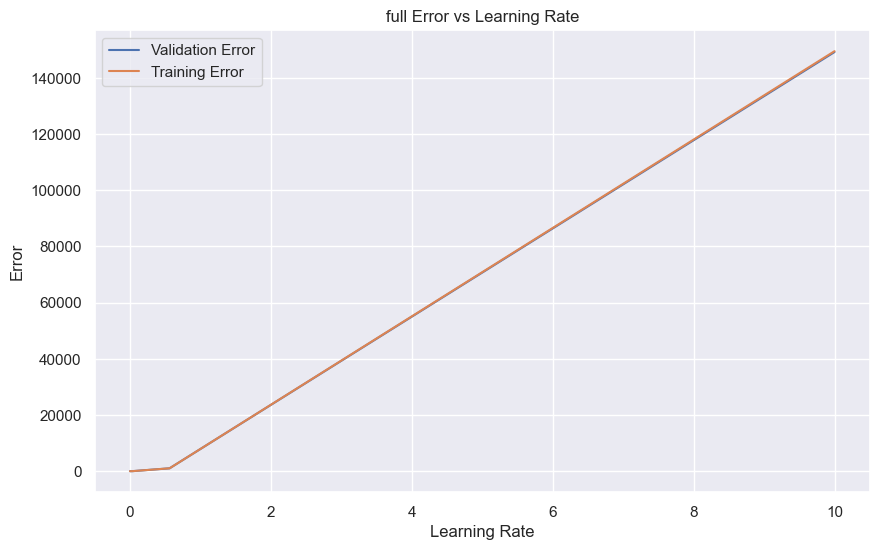

In [63]:
plot_err_vs_lr(momentum_df)

In [64]:
momentum_df

Learning_Rate  Error_Trein    Error_Val      R2_Train        R2_Val  \
0        0.00010      1.11818      1.12691       0.08273       0.09287   
1        0.00178      0.36312      0.36441       0.70212       0.70667   
2        0.03162      0.28750      0.28884       0.76416       0.76749   
3        0.56234   1020.41447   1019.85825    -836.07455    -819.95018   
4       10.00000 149466.53561 149153.51468 -122610.58301 -120062.35639   

   Iter_count  
0         300  
1         300  
2         300  
3           3  
4           2

In [65]:
momentum_lr = 0.03162
momentum_r2_train, momentum_r2_val, momentum_last_train_loss, momentum_val_loss, momentum_loss_history = get_train_result(lr=momentum_lr, descent_name='momentum', max_iter=iter_count, min_loss=0.26)

17.537473144015607
5.12014664733398
2.890420484980268
9.20408072480335
14.79770293166838
13.315279728842063
6.8735342626964995
2.2537708144366264
3.2619240566289984
7.458735452899327
9.642061404706348
7.429807193577854
3.1082823279838268
0.6231817243226156
1.513632202815618
3.907379050449344
4.966216037369777
3.7701606606623304
1.7848197952241556
0.9404481396459663
1.651840998128226
2.710955750319434
2.791653458258685
1.7878809515661027
0.7071112327514496
0.4896530211017848
1.1022204762007612
1.7377505326112743
1.725548706412784
1.14160364629797
0.588169472033428
0.5138271029921947
0.817011699909968
1.0587866754409254
0.9588807700398192
0.6383954436473335
0.4224632888726076
0.4799199486477622
0.6830045612234464
0.7835053269924591
0.6754374825299424
0.47276507090386355
0.36058700302658064
0.4054331657947786
0.5150738362949222
0.5579228586952372
0.4963107346915812
0.40268316572973206
0.3662591103675069
0.40215866321085186
0.45084361625739916
0.45099224142502753
0.40065051468283824
0.3490

In [66]:
print_params(momentum_lr, momentum_last_train_loss, momentum_val_loss, momentum_r2_train, momentum_r2_val, len(momentum_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.2662088718566899 
Ошибка на валидационной выборке = 0.2676161678500146 
R2_train = 0.7816214107367231 
R2_val = 0.7845783560232985 
Iter_count = 1500



In [67]:
plot_optimal_loss_history(momentum_loss_history)

### Adam

In [68]:
adam_lr_loss_history, adam_df = start_lr_seach(lambda_values=lambda_values, descent_name='adam')

23.4550503219502
23.44719115161967
23.439333408063835
23.43147711481251
23.423622295201298
23.415768972321764
23.407917168973196
23.40006690761676
23.392218210331983
23.38437109877607
23.376525594146212
23.36868171714507
23.36083948794963
23.352998926183478
23.34516005089264
23.33732288052498
23.329487432913062
23.321653725260653
23.313821774132457
23.305991595447352
23.29816320447458
23.290336615833127
23.282511843493715
23.274688900783655
23.266867800393896
23.259048554388414
23.25123117421549
23.243415670720815
23.2356020541621
23.22779033422502
23.21998052004026
23.21217262020154
23.204366642784297
23.196562595365016
23.188760485040834
23.180960318449525
23.17316210178946
23.165365840839613
23.157571540979436
23.149779207208432
23.14198884416551
23.134200456147795
23.126414047129124
23.11862962077793
23.110847180474547
23.103066729328045
23.095288270192253
23.087511805681338
23.079737338184533
23.071964869880357
23.06419440275012
23.05642593859071
23.04865947902683
23.0408950255225

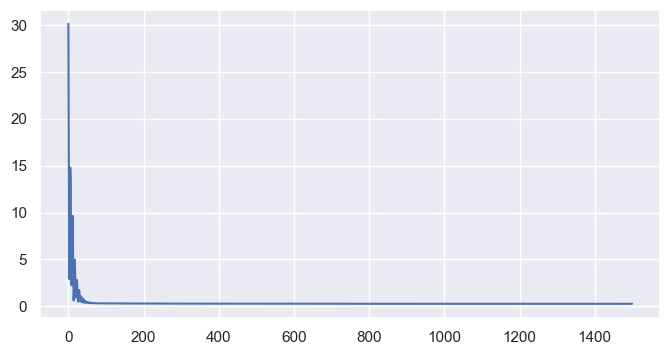

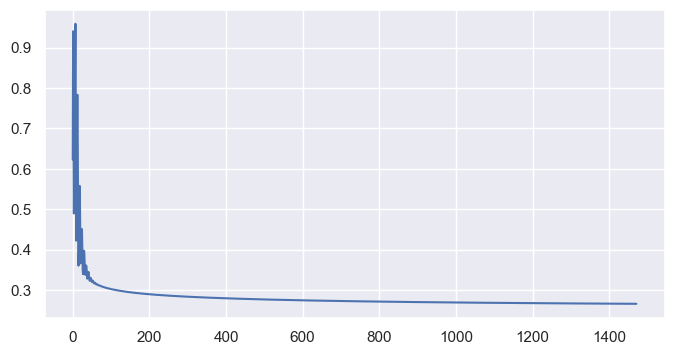

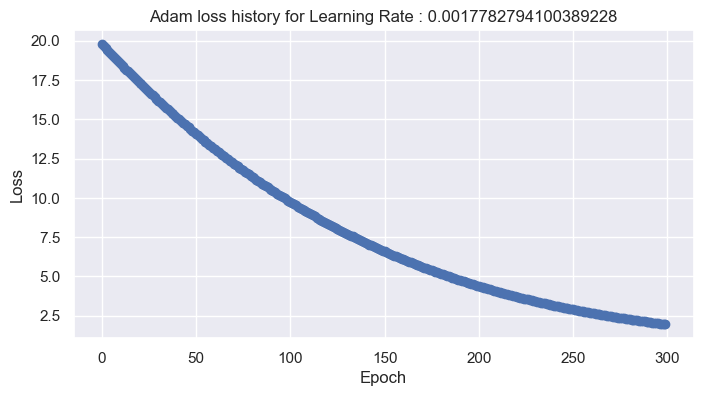

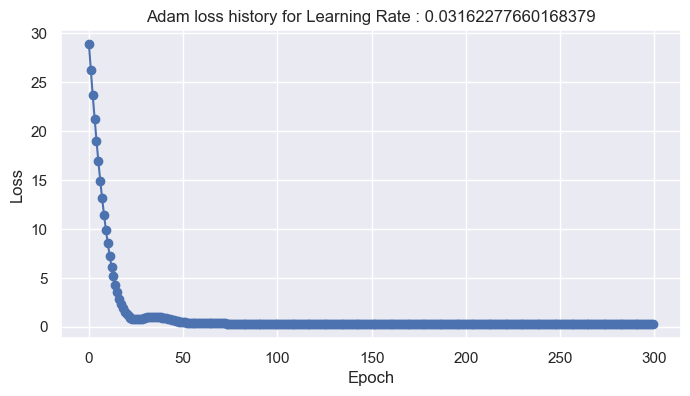

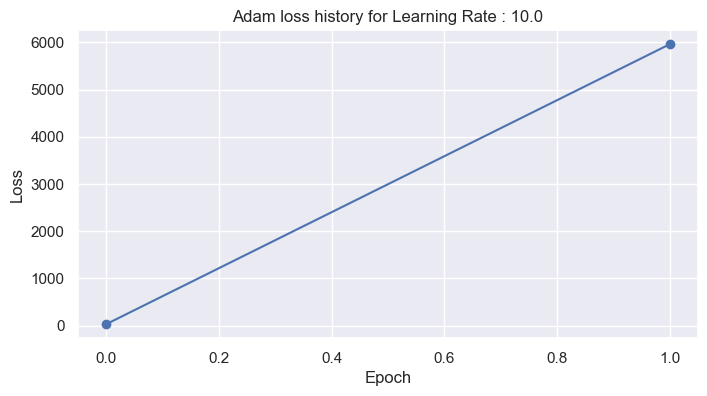

In [69]:
plot_loss_history(adam_lr_loss_history, descent_name='Adam')

In [70]:
plot_err_vs_lr(adam_df, descent_name='Adam')

In [71]:
adam_df

Learning_Rate  Error_Trein  Error_Val    R2_Train      R2_Val  Iter_count
0        0.00010     21.19842   21.15518   -16.38966   -16.02918         300
1        0.00178      1.95502    1.95370    -0.60376    -0.57266         300
2        0.03162      0.26143    0.26408     0.78555     0.78743         300
3        0.56234      0.25791    0.26016     0.78843     0.79058         300
4       10.00000   5959.81923 5948.39590 -4888.00654 -4787.25040           2

In [72]:
adam_lr = 0.56234
adam_r2_train, adam_r2_val, adam_last_train_loss, adam_val_loss, adam_loss_history = get_train_result(lr=adam_lr, descent_name='adam', max_iter=iter_count, min_loss=0.26)

4.321504953517914
6.919839470970426
3.112037608555919
2.189829065331505
4.30873198305921
4.1645603045546045
1.8841696471568865
0.6922684430949779
1.5768563580287227
2.579337207637083
2.186095936162258
1.1693793278391726
0.8765812891879484
1.3478155349270085
1.5503477341808298
1.0489426425697181
0.4984063365035735
0.5812569784999522
1.0773586315302375
1.23846458877125
0.8454513672358822
0.40139036069817
0.37480073448907936
0.6314829290664392
0.7372845700395265
0.5894243093848948
0.45507682700460983
0.49622353539424147
0.5542349389455978
0.4608067103281406
0.3214538689277109
0.33148881087161974
0.4585894955854891
0.49742441922982683
0.38849179195328026
0.28845799505906483
0.31304678235603955
0.3791398416246607
0.36807253389252254
0.3101678286327845
0.30242241691191235
0.3376620338000928
0.334743630604838
0.28871065386747086
0.27165384878371723
0.30191618675673454
0.31945257118025505
0.29550759170587865
0.27303084694857443
0.28114958046582716
0.29040742201292435
0.2780688192100332
0.26853

In [73]:
print_params(adam_lr, adam_last_train_loss, adam_val_loss, adam_r2_train, adam_r2_val, len(adam_loss_history))

Параметры:
lambda_ = 0.56234 
Ошибка на тренировочной выборке = 0.25962429406330295 
Ошибка на валидационной выборке = 0.2624620487648847 
R2_train = 0.7870229242151628 
R2_val = 0.788727241404516 
Iter_count = 58



### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

In [132]:
plot_optimal_loss_history(full_loss_history)

In [133]:
plot_optimal_loss_history(stochastic_loss_history)

In [134]:
plot_optimal_loss_history(momentum_loss_history)

In [135]:
plot_optimal_loss_history(adam_loss_history)

In [78]:
print_params(full_lr, full_last_train_loss, full_val_loss, full_r2_train, full_r2_val, len(full_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.29972503261595523 
Ошибка на валидационной выборке = 0.3017248540721452 
R2_train = 0.7541271658864999 
R2_val = 0.7571220580018169 
Iter_count = 1500



In [79]:
print_params(stochastic_lr, stochastic_last_train_loss, stochastic_val_loss, stochastic_r2_train, stochastic_r2_val, len(stochastic_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.3121472042966535 
Ошибка на валидационной выборке = 0.3118118318148478 
R2_train = 0.7439369107372369 
R2_val = 0.7490023941356666 
Iter_count = 1500



In [80]:
print_params(momentum_lr, momentum_last_train_loss, momentum_val_loss, momentum_r2_train, momentum_r2_val, len(momentum_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.2662088718566899 
Ошибка на валидационной выборке = 0.2676161678500146 
R2_train = 0.7816214107367231 
R2_val = 0.7845783560232985 
Iter_count = 1500



In [81]:
print_params(adam_lr, adam_last_train_loss, adam_val_loss, adam_r2_train, adam_r2_val, len(adam_loss_history))

Параметры:
lambda_ = 0.56234 
Ошибка на тренировочной выборке = 0.25962429406330295 
Ошибка на валидационной выборке = 0.2624620487648847 
R2_train = 0.7870229242151628 
R2_val = 0.788727241404516 
Iter_count = 58



Выше представленны результаты работы 4х различных методов градиентного спуска. Быстрей всего до минимального значения MSE сходится Adam. 

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [82]:
import time

from matplotlib.pyplot import tick_params

batch_sizes = np.arange(10, 1000, 100)
columns = ['batch_size', 'time_result', 'iter_count', 'r2_train', 'r2_val', 'last_train_loss', 'val_loss']

sgd_res_df = pd.DataFrame(columns=columns)

for batch in batch_sizes:

    

    for k in range(10):
        start_time = time.perf_counter()  

        r2_train, r2_val, last_train_loss, val_loss, loss_history =  get_train_result(lr=stochastic_lr, descent_name='stochastic', batch_size=batch, min_loss=0.335)

        end_time = time.perf_counter() 
        time_result = end_time - start_time

        temp_dict = {
            'batch_size': batch, 
            'time_result': time_result, 
            'iter_count': len(loss_history), 
            'r2_train': r2_train, 
            'r2_val': r2_val, 
            'last_train_loss': last_train_loss, 
            'val_loss': val_loss
        }

        print(temp_dict)
        # Превращаем словарь в строку DataFrame и добавляем к основному DataFrame
        # Создаём временный DataFrame из словаря
        temp_df = pd.DataFrame([temp_dict])
        
        # Используем pd.concat для добавления строки
        sgd_res_df = pd.concat([sgd_res_df, temp_df], ignore_index=True)  

11.138430799654873
5.657856529418701
4.453922692304081
3.141582529622817
1.7427857774051665
1.6266467565745166
1.1768448608409752
1.139509467106285
1.103335659266672
1.0366769114029724
0.9802976837020801
0.9152946700870331
0.8635213641439916
0.796256026503402
0.7821519447921382
0.799203551849566
0.7689904981823918
0.7595272746135359
0.7824378207988602
0.7495045457252899
0.7339908553250452
0.7077249607834873
0.6971415107547423
0.6644480929497347
0.6594398312777351
0.6480306157678221
0.6505832956678006
0.6454841197172453
0.6585748983324778
0.6458809286739274
0.6313848719915304
0.6244913479855182
0.6225499736809567
0.626645317868703
0.6170377149233711
0.6059771819794036
0.6071608284939131
0.6239639906603756
0.6188378386025674
0.6249484891125838
0.5986420300867598
0.6019706730577963
0.5867423190151431
0.5883546295561203
0.6055318843142689
0.5757539341724595
0.5737439236385957
0.5749849828205363
0.5630921664941057
0.5578359328027958
0.5610682431837933
0.5436490427917889
0.5401218876423542
0

In [83]:
sgd_res_df

batch_size  time_result iter_count  r2_train  r2_val  last_train_loss  \
0          10     23.30222        500   0.71425 0.71722          0.34834   
1          10     23.75668        500   0.66410 0.66561          0.40947   
2          10     23.17532        500   0.71626 0.72084          0.34589   
3          10     23.10313        500   0.70071 0.70344          0.36484   
4          10     23.21727        500   0.71374 0.71627          0.34896   
..        ...          ...        ...       ...     ...              ...   
95        910     16.73291        370   0.72534 0.72787          0.33481   
96        910     22.50173        500   0.71825 0.71818          0.34346   
97        910     22.35946        494   0.72523 0.72775          0.33495   
98        910     19.62696        436   0.72521 0.72855          0.33498   
99        910     21.38718        475   0.72522 0.72668          0.33496   

    val_loss  
0    0.35130  
1    0.41541  
2    0.34679  
3    0.36841  
4    0.35248  
..       ...  
95   0.33807  
96   0.35010  
97   0.33821  
98   0.33722  
99   0.33954  

[100 rows x 7 columns]

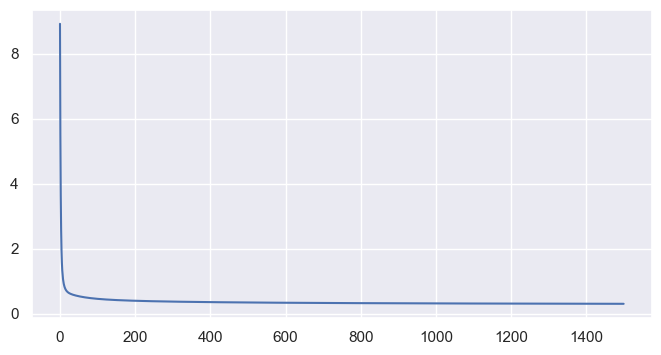

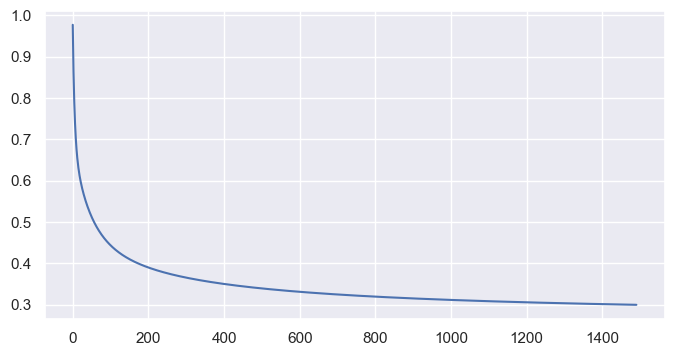

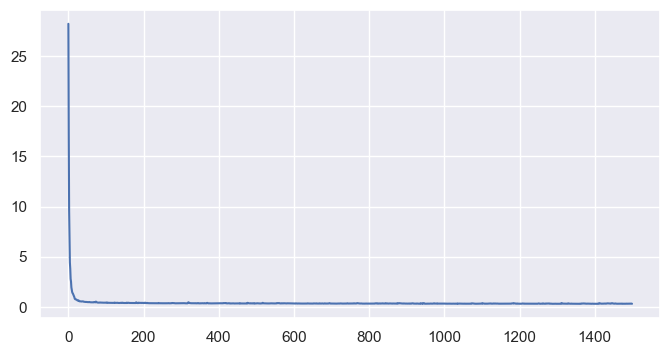

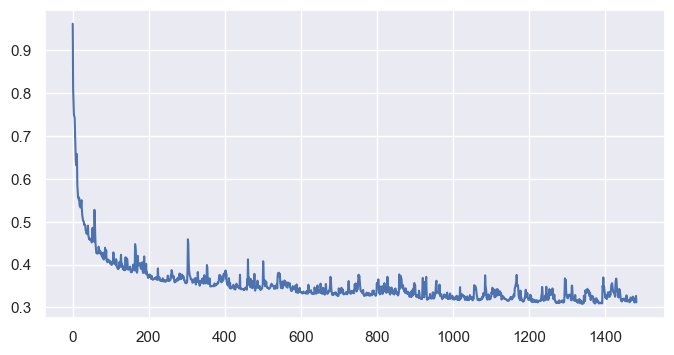

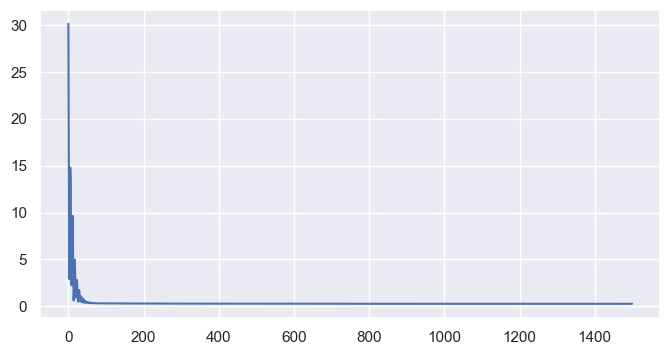

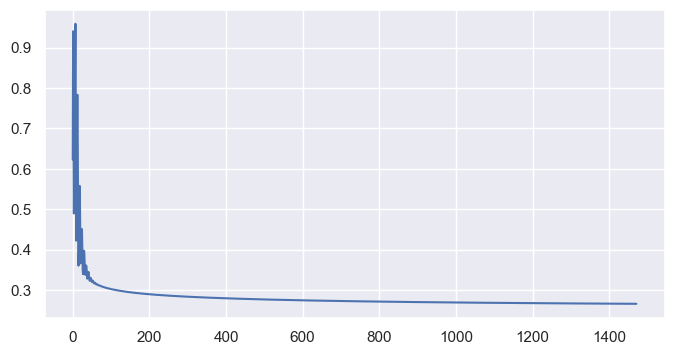

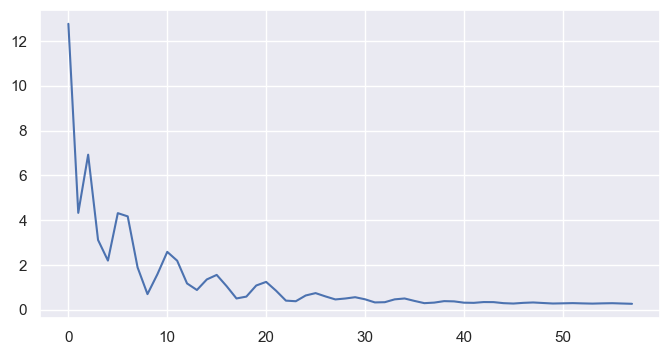

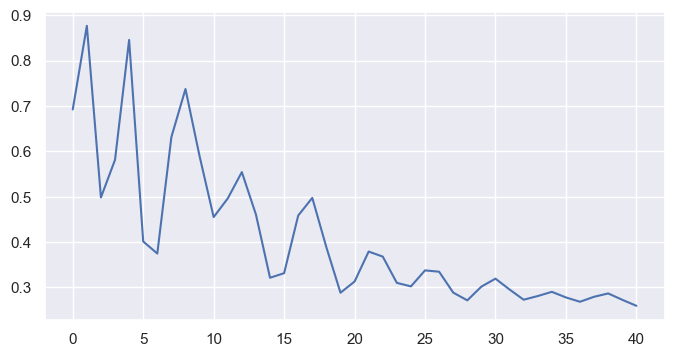

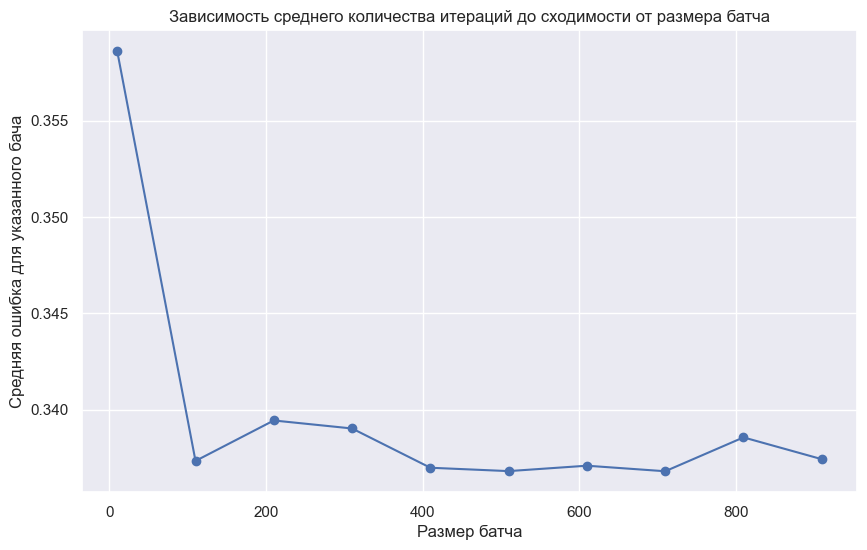

In [84]:
grouped_loss = sgd_res_df.groupby('batch_size')['last_train_loss'].mean().reset_index()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(grouped_loss['batch_size'], grouped_loss['last_train_loss'], marker='o', linestyle='-', color='b')
plt.title('Зависимость среднего количества итераций до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Средняя ошибка для указанного бача')
plt.grid(True)
plt.show()

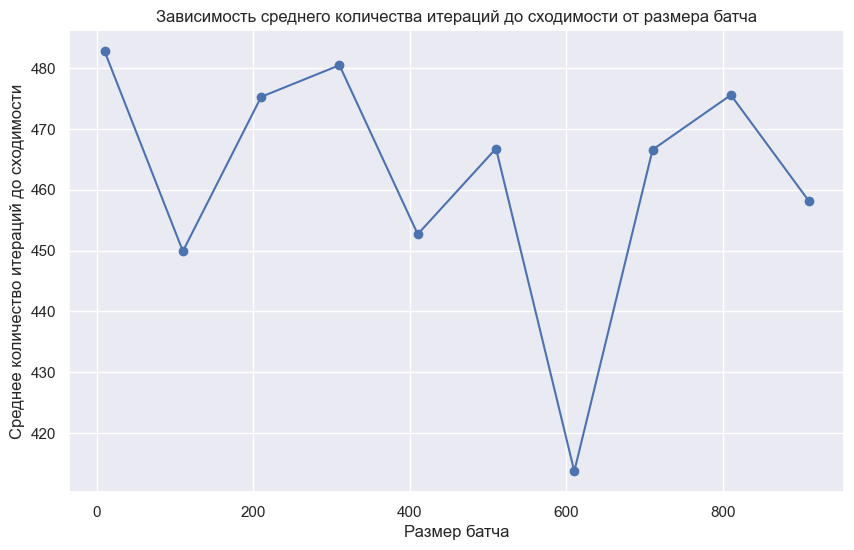

In [85]:
# Группируем по размеру батча и считаем среднее количество итераций
grouped_iter = sgd_res_df.groupby('batch_size')['iter_count'].mean().reset_index()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(grouped_iter['batch_size'], grouped_iter['iter_count'], marker='o', linestyle='-', color='b')
plt.title('Зависимость среднего количества итераций до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее количество итераций до сходимости')
plt.grid(True)
plt.show()

In [86]:
grouped_iter

batch_size iter_count
0          10  482.80000
1         110  449.90000
2         210  475.30000
3         310  480.50000
4         410  452.70000
5         510  466.80000
6         610  413.70000
7         710  466.60000
8         810  475.60000
9         910  458.10000

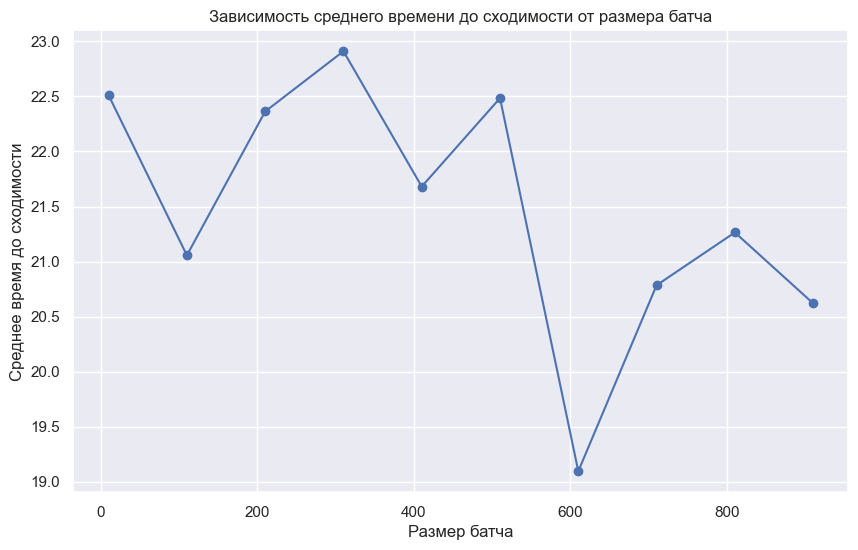

In [87]:
# Группируем по размеру батча и считаем среднее количество итераций
grouped_time = sgd_res_df.groupby('batch_size')['time_result'].mean().reset_index()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(grouped_time['batch_size'], grouped_time['time_result'], marker='o', linestyle='-', color='b')
plt.title('Зависимость среднего времени до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее время до сходимости')
plt.grid(True)
plt.show()

In [88]:
grouped_time

batch_size  time_result
0          10     22.51008
1         110     21.05699
2         210     22.36281
3         310     22.90972
4         410     21.68107
5         510     22.48406
6         610     19.09645
7         710     20.78520
8         810     21.26465
9         910     20.62074

Исходя из результатов по времени и количеству итераций опримальный размер бача находится в районе 100.

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [89]:
mu_values = np.logspace(-4, 1, num=5)

### Full mu и lr анализ

In [90]:
full_mu_and_lr_loss, full_mu_and_lr_df = start_lr_and_mu_seach(lambda_values=lambda_values, mu_valuse=mu_values, descent_name='full', descent_reg=True)

25.996328195585875
25.9544133557069
25.91257002881939
25.87079809141077
25.829097420182705
25.787467892050717
25.745909384143854
25.704421773804224
25.66300493858675
25.62165875625869
25.580383104799342
25.539177862399647
25.498042907461805
25.45697811859895
25.415983374634735
25.375058554603015
25.334203537747435
25.29341820352111
25.252702431586215
25.212056101813683
25.17147909428277
25.130971289280723
25.09053256730247
25.05016280905018
25.009861895432948
24.96962970756641
24.92946612677242
24.88937103457864
24.849344312718248
24.80938584312952
24.76949550795551
24.72967318954369
24.68991877044557
24.650232133416374
24.61061316141468
24.571061737602047
24.53157774534268
24.492161068203092
24.452811589951715
24.41352919455856
24.374313766194906
24.335165189232907
24.29608334824525
24.257068128004818
24.218119413484324
24.179237089856016
24.140421042491255
24.101671156960208
24.062987319031524
24.02436941467195
23.985817330045972
23.94733095151557
23.908910165639764
23.87055485917431

In [91]:
full_mu_and_lr_df

Learning_Rate       Mu  Error_Trein    Error_Val      R2_Train  \
0         0.00010  0.00010     16.19358     16.12532     -12.28404   
1         0.00010  0.00178     14.36148     14.34871     -10.78112   
2         0.00010  0.03162     14.11561     14.10617     -10.57943   
3         0.00010  0.56234     15.53472     15.53769     -11.74357   
4         0.00010 10.00000     19.80102     19.79754     -15.24333   
5         0.00178  0.00010      0.47500      0.47678       0.61035   
6         0.00178  0.00178      0.80242      0.80977       0.34175   
7         0.00178  0.03162      0.65841      0.66073       0.45989   
8         0.00178  0.56234      0.90252      0.90691       0.25964   
9         0.00178 10.00000      7.44793      7.47313      -5.10975   
10        0.03162  0.00010      0.37085      0.37338       0.69578   
11        0.03162  0.00178      0.36921      0.37341       0.69712   
12        0.03162  0.03162      0.33536      0.33912       0.72490   
13        0.03162  0.56234      0.37297      0.38065       0.69404   
14        0.03162 10.00000      0.87308      0.89174       0.28379   
15        0.56234  0.00010   3709.66594   3704.21457   -3042.14281   
16        0.56234  0.00178   2714.51666   2711.15345   -2225.79400   
17        0.56234  0.03162   3803.84814   3798.11296   -3119.40310   
18        0.56234  0.56234   5709.93758   5701.39810   -4683.02163   
19        0.56234 10.00000   4793.89260   4806.65794   -3931.56429   
20       10.00000  0.00010 184822.37921 184455.59541 -151613.97119   
21       10.00000  0.00178 118910.73353 118698.59659  -97544.80325   
22       10.00000  0.03162 152133.40663 151809.67742 -124798.29196   
23       10.00000  0.56234 158691.56844 158389.52778 -130178.13566   
24       10.00000 10.00000  13088.39014  13067.70446  -10735.77280   

          R2_Val  Iter_count  
0      -11.98032         300  
1      -10.55021         300  
2      -10.35497         300  
3      -11.50730         300  
4      -14.93633         300  
5        0.61621         300  
6        0.34816         300  
7        0.46814         300  
8        0.26997         300  
9       -5.01561         300  
10       0.69944         300  
11       0.69942         300  
12       0.72702         300  
13       0.69359         300  
14       0.28218         300  
15   -2980.76302         300  
16   -2181.38359         300  
17   -3056.34793         300  
18   -4588.42583         300  
19   -3868.19132         300  
20 -148479.29521         300  
21  -95547.21377         300  
22 -122200.47439         300  
23 -127497.02352         300  
24  -10518.04450         300

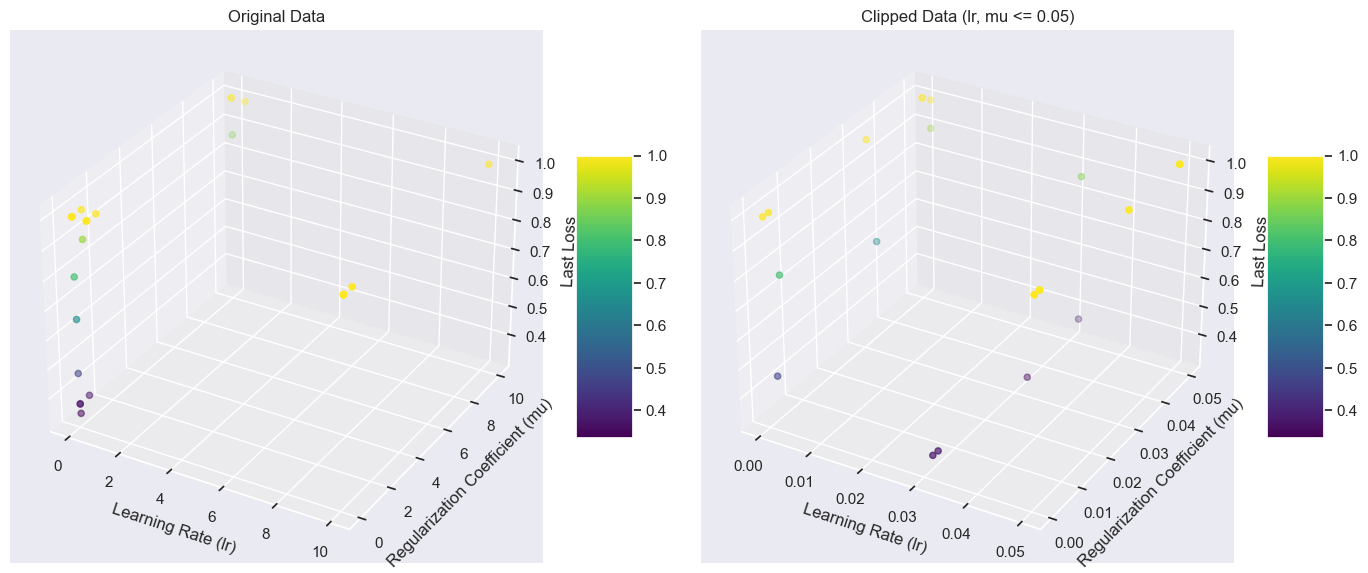

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_loss_mu_lr(list_of_dictionaries):
    # Первоначальный код для получения исходных данных
    lrs = [d['lr'] for d in list_of_dictionaries]
    mus = [d['mu'] for d in list_of_dictionaries]
    last_losses = [d['loss_history'][-1] for d in list_of_dictionaries]
    last_losses = np.clip(last_losses, None, 1)
    lrs = np.array(lrs)
    mus = np.array(mus)
    last_losses = np.array(last_losses)

    # Построение первого графика
    fig = plt.figure(figsize=(14, 6))

    # Первый график
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(lrs, mus, last_losses, c=last_losses, cmap='viridis')
    ax1.set_xlabel('Learning Rate (lr)')
    ax1.set_ylabel('Regularization Coefficient (mu)')
    ax1.set_zlabel('Last Loss')
    ax1.set_title('Original Data')
    fig.colorbar(scatter1, shrink=0.5, aspect=5)

    # Ограничение lr и mu значениями до 0.05
    lrs_clipped = np.clip(lrs, None, 0.05)
    mus_clipped = np.clip(mus, None, 0.05)

    # Второй график
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(lrs_clipped, mus_clipped, last_losses, c=last_losses, cmap='viridis')
    ax2.set_xlabel('Learning Rate (lr)')
    ax2.set_ylabel('Regularization Coefficient (mu)')
    ax2.set_zlabel('Last Loss')
    ax2.set_title('Clipped Data (lr, mu <= 0.05)')
    fig.colorbar(scatter2, shrink=0.5, aspect=5)

    plt.tight_layout()
    plt.show()
    
plot_3d_loss_mu_lr(full_mu_and_lr_loss)

In [93]:
full_mu_lr = 0.03162
full_mu = 0.03162

In [94]:
full_mu_r2_train, full_mu_r2_val, full_mu_last_train_loss, full_mu_val_loss, full_mu_loss_history = get_train_result(lr=full_mu_lr, descent_name='full', descent_reg=True, mu=full_mu, max_iter=iter_count, min_loss=0.26)

11.517927666591714
7.030669026957192
4.560057492497148
3.167857910168403
2.3580794992711374
1.8674514947360985
1.555370898419376
1.3460572903061006
1.198116358715947
1.088499539888231
1.0040301889741439
0.9369107511498719
0.8823276871893433
0.8371643484172242
0.7993010563377361
0.7672280101307308
0.7398261318665424
0.7162390818284506
0.6957955676629247
0.6779600220478813
0.6622997622479037
0.6484620881279086
0.6361576392957982
0.6251478830991476
0.615235457562727
0.606256571382428
0.5980749385713031
0.590576889679196
0.5836674036279565
0.5772668705890187
0.5713084414896863
0.565735851775452
0.560501630623201
0.5555656246431958
0.5508937789173752
0.5464571290837689
0.5422309668209051
0.5381941480223923
0.5343285185510769
0.5306184370016972
0.5270503775932275
0.5236125993227106
0.5202948699720213
0.5170882355717684
0.5139848275759717
0.5109777013544656
0.508060700721617
0.505228344134041
0.5024757289423712
0.4997984507020439
0.4971925350592555
0.4946543801502221
0.49218070780048756
0.489

In [95]:
print_params(full_mu_lr, full_mu_last_train_loss, full_mu_val_loss, full_mu_r2_train, full_mu_r2_val, iter_count=iter_count, mu=full_mu)
print_params(full_lr, full_last_train_loss, full_val_loss, full_r2_train, full_r2_val, iter_count=iter_count)

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.29380390785301946 
Ошибка на валидационной выборке = 0.2970387477475122 
R2_train = 0.7589844302727816 
R2_val = 0.7608942094992849 
Iter_count = 1500
mu = 0.03162 

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.29972503261595523 
Ошибка на валидационной выборке = 0.3017248540721452 
R2_train = 0.7541271658864999 
R2_val = 0.7571220580018169 
Iter_count = 1500



In [96]:
def plot_error_lines(errors, errors_mu, start_val: int = 100):
    """
    Функция для отображения двух линий ошибок на графике, а также второго графика
    с данными начиная с 100-й итерации.

    Параметры:
    - errors: Список значений ошибок для метода без регуляризации.
    - errors_mu: Список значений ошибок для метода с регуляризацией.
    """
    
    # Создаем фигуру и два подграфика (subplots)
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    
    # Первый подграфик для всех данных
    axs[0].plot(range(1, len(errors) + 1), errors, label='Ошибки', marker='o')
    axs[0].plot(range(1, len(errors_mu) + 1), errors_mu, label='Ошибки с регуляризацией', marker='s')
    axs[0].set_title('График всех ошибок')
    axs[0].set_xlabel('Номер итерации')
    axs[0].set_ylabel('Значение ошибки')
    axs[0].legend()

    
    axs[1].plot(range(start_val + 1, len(errors) + 1), errors[start_val:], label='Ошибки', marker='o')
    axs[1].plot(range(start_val + 1, len(errors_mu) + 1), errors_mu[start_val:], label='Ошибки с регуляризацией', marker='s')
    axs[1].set_title('График ошибок с {}-й итерации'.format(start_val))
    axs[1].set_xlabel('Номер итерации')
    axs[1].set_ylabel('Значение ошибки')
    axs[1].legend()


    plt.tight_layout()
    plt.show()

plot_error_lines(full_loss_history, full_mu_loss_history)

### Stochastic mu lr

In [97]:
stochastic_mu_and_lr_loss, stochastic_mu_and_lr_df = start_lr_and_mu_seach(lambda_values=lambda_values, mu_valuse=mu_values, descent_name='stochastic', 
                                                                           descent_reg=True, batch_size=batch_size)

22.027058867130364
21.995465589964727
21.96145310663463
21.92590427377188
21.888856442362464
21.85140454775768
21.813073789405255
21.77195422492113
21.7363698712537
21.70288677733743
21.669390114814615
21.63871886588804
21.597767905245735
21.556598799992642
21.522312930281725
21.493416022615133
21.462715725589486
21.431620886967846
21.39800833058007
21.361073068204295
21.322544813478153
21.284715798758096
21.247523017693553
21.216966653827775
21.183645965361723
21.15173694196824
21.116777474220445
21.079500452558527
21.048382709179986
21.016539246474686
20.983255403165703
20.94743307136793
20.911816268114663
20.87630575897864
20.846272827468866
20.812954331971845
20.774206822347598
20.734285206786897
20.70033382179183
20.67062896820512
20.6389433386037
20.60308879251268
20.575432122658537
20.540946550676814
20.501954778715557
20.467605109967028
20.431852668920712
20.39304954730471
20.359247713166518
20.325866648955426
20.284550482137046
20.244568497630556
20.210441502378313
20.17534707

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

In [98]:
plot_3d_loss_mu_lr(stochastic_mu_and_lr_loss)

In [99]:
stochastic_mu_and_lr_df

Learning_Rate       Mu  Error_Trein    Error_Val      R2_Train  \
0         0.00010  0.00010     13.68193     13.75212     -10.22367   
1         0.00010  0.00178     18.03613     18.00890     -13.79554   
2         0.00010  0.03162     11.56660     11.53376      -8.48841   
3         0.00010  0.56234     17.52141     17.41836     -13.37330   
4         0.00010 10.00000     19.79877     19.83016     -15.24148   
5         0.00178  0.00010      0.69430      0.70687       0.43044   
6         0.00178  0.00178      0.63190      0.63706       0.48164   
7         0.00178  0.03162      0.88862      0.88592       0.27104   
8         0.00178  0.56234      0.95492      0.97164       0.21666   
9         0.00178 10.00000      7.45710      7.48212      -5.11726   
10        0.03162  0.00010      0.40290      0.40291       0.66949   
11        0.03162  0.00178      0.37535      0.38264       0.69209   
12        0.03162  0.03162      0.34347      0.34866       0.71824   
13        0.03162  0.56234      0.38475      0.39362       0.68438   
14        0.03162 10.00000      0.87090      0.89071       0.28557   
15        0.56234  0.00010   6037.41798   6015.01752   -4951.66297   
16        0.56234  0.00178   1633.64307   1635.02021   -1339.12314   
17        0.56234  0.03162   3678.52805   3680.50116   -3016.59952   
18        0.56234  0.56234   5782.85866   5763.48530   -4742.84083   
19        0.56234 10.00000   4451.49903   4429.14259   -3650.68926   
20       10.00000  0.00010 122094.68568 121860.52811 -100156.68832   
21       10.00000  0.00178 192778.19353 192906.22174 -158140.34837   
22       10.00000  0.03162 109615.04232 109482.36241  -89919.28754   
23       10.00000  0.56234  82064.62909  81799.22230  -67318.91238   
24       10.00000 10.00000  34845.47661  34738.27170  -28583.71986   

          R2_Val  Iter_count  
0      -10.06997         300  
1      -13.49654         300  
2       -8.28427         300  
3      -13.02117         300  
4      -14.96258         300  
5        0.43100         300  
6        0.48719         300  
7        0.28686         300  
8        0.21786         300  
9       -5.02284         300  
10       0.67567         300  
11       0.69199         300  
12       0.71934         300  
13       0.68315         300  
14       0.28301         300  
15   -4840.87847         300  
16   -1315.13401         300  
17   -2961.67455         300  
18   -4638.40385         300  
19   -3564.30469         300  
20  -98092.45792         300  
21 -155281.75348         300  
22  -88128.46799         300  
23  -65844.50958         300  
24  -27962.09228         300

In [100]:
stochastic_mu_lr = 0.03162
stochastic_mu = 0.03162

In [101]:

stochastic_mu_r2_train, stochastic_mu_r2_val, stochastic_mu_last_train_loss, stochastic_mu_val_loss, stochastic_mu_loss_history = get_train_result(lr=stochastic_mu_lr, descent_name='stochastic', descent_reg=True, mu=stochastic_mu, batch_size=batch_size, max_iter=iter_count, min_loss=0.26)

12.494719027031367
6.293358245644765
4.417168523204458
2.5874155927343985
1.6669364263780186
1.4280417238211829
1.1828716415601521
1.1206656064273208
1.0052450758614844
0.9607885024884287
0.9281517010114105
0.9233067706192536
0.9102388153247589
0.8689630711813766
0.7907279438899784
0.7656870569097946
0.7458243094077108
0.7224011011200441
0.7193290927306325
0.7319442242129588
0.7289450699673755
0.6662980795976325
0.66497966798411
0.6755188245066043
0.6840896042617137
0.6581969019775088
0.6298982969121368
0.6312958005767153
0.6265247654694929
0.6284280203802182
0.627370963997294
0.6267074435940247
0.6208523368548245
0.6140807234179702
0.6157093895684854
0.6209133976768304
0.6126167781070213
0.5872044822654661
0.5815253384542662
0.5842976040854755
0.5760725272830531
0.5782561871177144
0.5815868698517889
0.5859559159804958
0.5934848496424017
0.5927143654352369
0.6042250644763577
0.5525412990960534
0.5545864479206964
0.5525173387650013
0.5445910155999931
0.5459566447327244
0.520492636834068

In [102]:
print_params(stochastic_mu_lr, stochastic_mu_last_train_loss, stochastic_mu_val_loss, stochastic_mu_r2_train, stochastic_mu_r2_val, 
             iter_count=len(stochastic_mu_loss_history), mu=stochastic_mu, batch_sizes=batch_size)
print_params(stochastic_lr, stochastic_last_train_loss, stochastic_val_loss, stochastic_r2_train, stochastic_r2_val, iter_count=len(stochastic_loss_history), batch_sizes=batch_size)

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.30386810453743734 
Ошибка на валидационной выборке = 0.3070691167359115 
R2_train = 0.7507284880170537 
R2_val = 0.7528201136980741 
Iter_count = 1500
mu = 0.03162 
Batch_size = 10 

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.3121472042966535 
Ошибка на валидационной выборке = 0.3118118318148478 
R2_train = 0.7439369107372369 
R2_val = 0.7490023941356666 
Iter_count = 1500
Batch_size = 10 



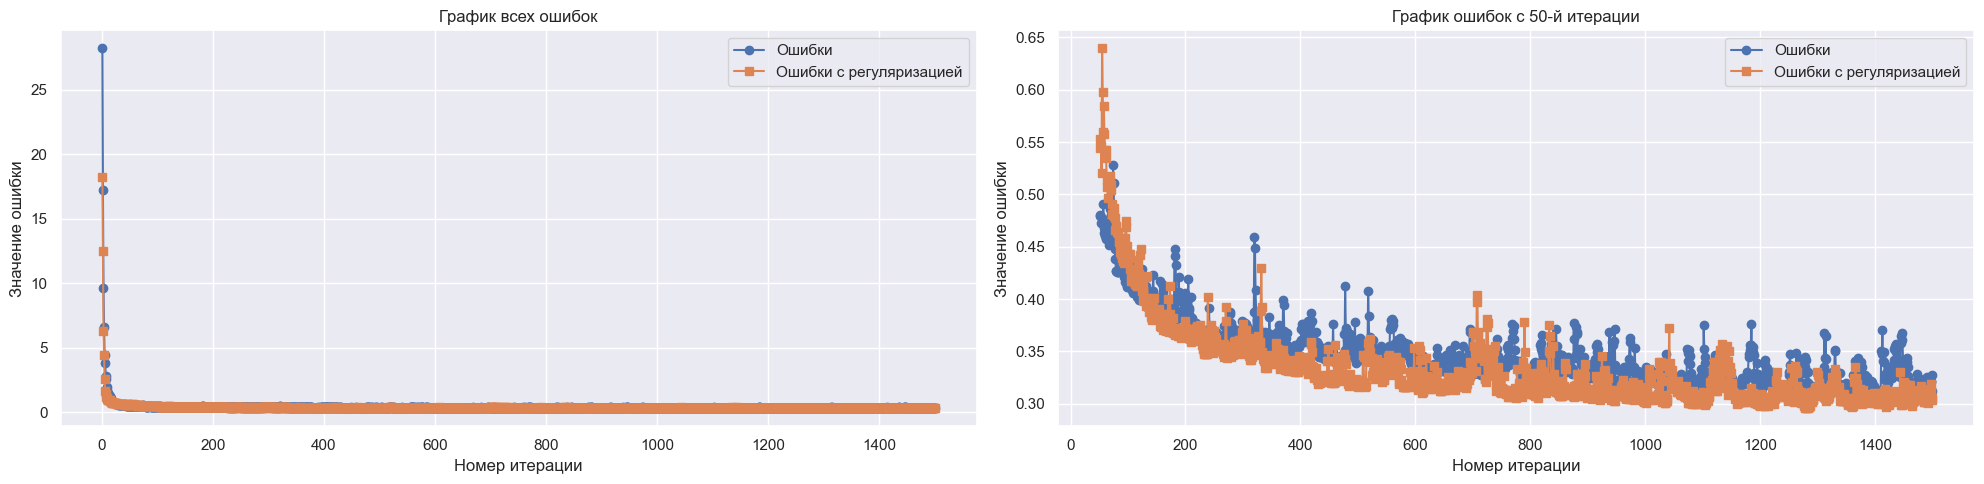

In [103]:
plot_error_lines(stochastic_loss_history, stochastic_mu_loss_history, 50)

### Momentum lr mu  

In [104]:
momentum_mu_and_lr_loss, momentum_mu_and_lr_df = start_lr_and_mu_seach(lambda_values=lambda_values, mu_valuse=mu_values, descent_name='momentum', descent_reg=True)

20.043245077527644
19.983412599006304
19.89830302798304
19.790692959137168
19.663134023743417
19.517964385723808
19.357321041570756
19.18315250224811
18.99723153697018
18.80116773997131
18.596419745883935
18.384306970309257
18.166020792184288
17.942635125735897
17.715116353894445
17.48433261342112
17.25106243583072
17.016002758392393
16.779776326821302
16.542938516342033
16.305983601105126
16.0693505038661
15.833428058712359
15.598559819701896
15.365048447762296
15.133159707251231
14.903126102327695
14.67515018182689
14.449407539748714
14.226049536820975
14.005205766928494
13.786986290543696
13.571483655677714
13.35877472531187
13.14892232877998
12.941976753160493
12.73797708940835
12.536952446711968
12.33892304740055
12.143901213650004
11.95189225623885
11.762895274686372
11.576903877258957
11.393906828553828
11.213888631657683
11.036830051226746
10.862708583240044
10.691498876635777
10.523173111546587
10.357701338400403
10.195051781745079
10.035191112284242
9.878084690275367
9.723696

In [105]:
momentum_mu_and_lr_df

Learning_Rate       Mu  Error_Trein    Error_Val      R2_Train  \
0         0.00010  0.00010      1.04973      1.05139       0.13888   
1         0.00010  0.00178      1.28299      1.30064      -0.05247   
2         0.00010  0.03162      0.87240      0.88420       0.28435   
3         0.00010  0.56234      1.31518      1.32922      -0.07888   
4         0.00010 10.00000     11.01983     11.04703      -8.03988   
5         0.00178  0.00010      0.40183      0.41022       0.67036   
6         0.00178  0.00178      0.38106      0.38811       0.68741   
7         0.00178  0.03162      0.37022      0.37235       0.69630   
8         0.00178  0.56234      0.43182      0.43897       0.64577   
9         0.00178 10.00000      0.87310      0.89176       0.28378   
10        0.03162  0.00010      0.28776      0.28847       0.76394   
11        0.03162  0.00178      0.28188      0.28326       0.76877   
12        0.03162  0.03162      0.28881      0.29202       0.76308   
13        0.03162  0.56234      0.36228      0.37104       0.70281   
14        0.03162 10.00000      0.87299      0.89165       0.28387   
15        0.56234  0.00010   3511.36385   3507.13961   -2879.47006   
16        0.56234  0.00178   1140.43448   1139.59317    -934.53033   
17        0.56234  0.03162   1175.60648   1174.89647    -963.38290   
18        0.56234  0.56234   1649.07680   1647.17521   -1351.78386   
19        0.56234 10.00000   3094.09278   3105.89607   -2537.17092   
20       10.00000  0.00010 210931.00062 210546.82452 -173031.60415   
21       10.00000  0.00178 198013.01681 197515.51806 -162434.62044   
22       10.00000  0.03162 172244.68331 171891.83305 -141296.13517   
23       10.00000  0.56234 190021.54621 189652.27246 -155878.99341   
24       10.00000 10.00000  18373.33272  18281.21864  -15071.15913   

          R2_Val  Iter_count  
0        0.15367         300  
1       -0.04697         300  
2        0.28825         300  
3       -0.06998         300  
4       -7.89247         300  
5        0.66979         300  
6        0.68758         300  
7        0.70027         300  
8        0.64665         300  
9        0.28217         300  
10       0.76779         300  
11       0.77199         300  
12       0.76493         300  
13       0.70132         300  
14       0.28226         300  
15   -2822.12458         300  
16    -916.33260         300  
17    -944.75052         300  
18   -1324.91837         300  
19   -2499.13757         300  
20 -169481.82100         300  
21 -158992.07562         300  
22 -138365.90645         300  
23 -152662.43826         300  
24  -14714.74085         300

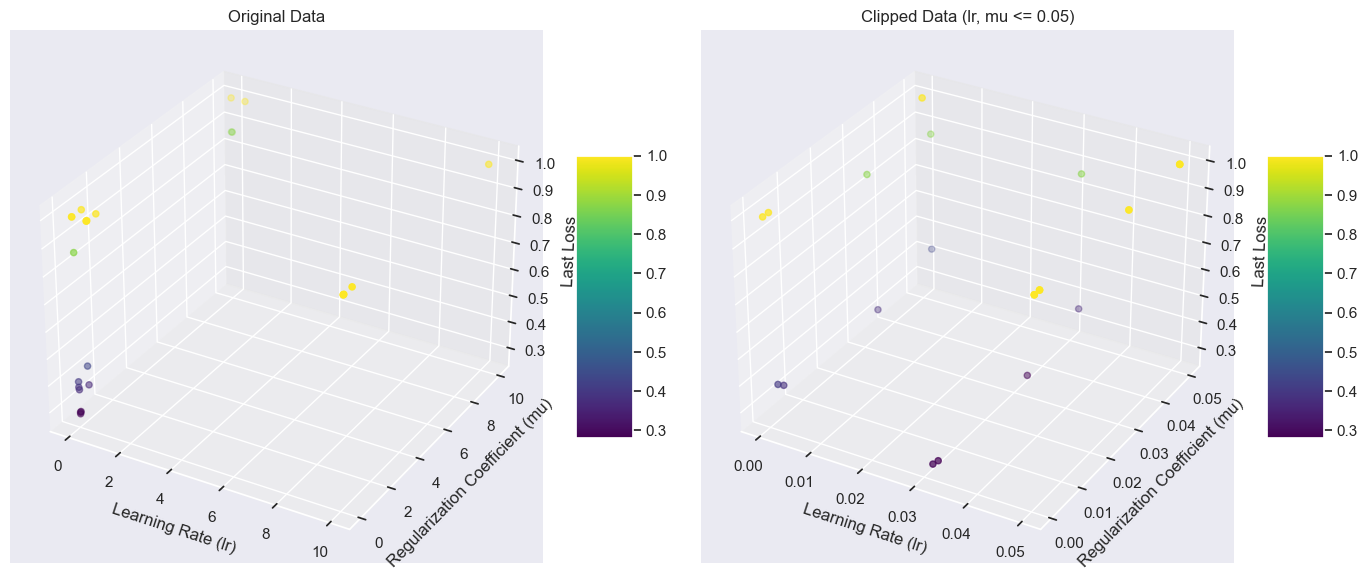

In [106]:
plot_3d_loss_mu_lr(momentum_mu_and_lr_loss)

In [107]:
momentum_mu_lr = 0.03162
momentum_mu = 0.00178

In [108]:

momentum_mu_r2_train, momentum_mu_r2_val, momentum_mu_last_train_loss, momentum_mu_val_loss, momentum_mu_loss_history = get_train_result(lr=momentum_mu_lr, descent_name='momentum', descent_reg=True, mu=momentum_mu, max_iter=iter_count, min_loss=0.26)

9.311846011146608
3.2746373487047076
1.887459764557513
4.485163798253037
6.882054304468286
6.193656996923485
3.373605110736837
1.4596466299894548
2.0960741004866734
4.088506760676065
5.042464497800568
3.9165227199887847
1.822054217700731
0.5995162628252578
0.9500519613728754
2.003651373947457
2.4645412842277326
1.92710798239675
1.064570700034605
0.7357913941491305
1.094198896216854
1.567989036189209
1.5624402294756663
1.0578577103540778
0.534562346816661
0.42052304458046746
0.6873851667055679
0.9606441427301152
0.9423143992687981
0.6791915131981049
0.44746961865824764
0.439285992742547
0.5926770471593992
0.7015666756627703
0.6444679570212963
0.4865252283695704
0.3799842644935442
0.39877244902933867
0.48114667991918497
0.5159373886368449
0.46111809629960454
0.37277716485653895
0.3327171319975509
0.36387751711297256
0.4180681222223929
0.4345799294937597
0.3998694359601228
0.35071350661135436
0.3288602197116384
0.3404367100301448
0.35828160513263047
0.35620773068040024
0.33528173810903544

In [109]:
# Печать параметров для градиентного спуска с моментом и регуляризацией
print_params(momentum_mu_lr, momentum_mu_last_train_loss, momentum_mu_val_loss, 
             momentum_mu_r2_train, momentum_mu_r2_val, iter_count=len(momentum_mu_loss_history), 
             mu=momentum_mu)

# Печать параметров для градиентного спуска с моментом без регуляризации
print_params(momentum_lr, momentum_last_train_loss, momentum_val_loss, 
             momentum_r2_train, momentum_r2_val, iter_count=len(momentum_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.2882905416297178 
Ошибка на валидационной выборке = 0.2915238362919002 
R2_train = 0.7635071989150851 
R2_val = 0.7653335201048374 
Iter_count = 1500
mu = 0.03162 

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.2662088718566899 
Ошибка на валидационной выборке = 0.2676161678500146 
R2_train = 0.7816214107367231 
R2_val = 0.7845783560232985 
Iter_count = 1500



In [110]:
plot_error_lines(momentum_loss_history, momentum_mu_loss_history, 50)

### Adam lr mu

In [111]:
adam_mu_and_lr_loss, adam_mu_and_lr_df = start_lr_and_mu_seach(lambda_values=lambda_values, mu_valuse=mu_values, descent_name='adam', descent_reg=True) 

18.634928688208365
18.627952187532124
18.620977113667255
18.61400349015091
18.60703134032109
18.60006068726663
18.59309155377904
18.58612396230654
18.579157934910594
18.572193493225207
18.565230658419257
18.558269451162037
18.551309891592105
18.544351999289702
18.53739579325261
18.530441291875643
18.523488512933667
18.516537473568118
18.50958819027697
18.502640678907984
18.495694954655118
18.488751032057973
18.481808925004042
18.47486864673357
18.467930209846852
18.460993626313723
18.454058907485024
18.44712606410582
18.440195106330194
18.433266043737316
18.42633888534864
18.419413639646077
18.41249031459084
18.40556891764283
18.3986494557805
18.391731935520827
18.384816362939493
18.37790274369098
18.37099108302854
18.36408138582391
18.357173656586724
18.350267899483473
18.34336411835605
18.336462316739734
18.329562497880616
18.322664664752423
18.315768820072737
18.308874966318506
18.30198310574095
18.295093240379792
18.288205372076806
18.2813195024887
18.274435633099365
18.26755376523

In [112]:
adam_mu_and_lr_df

Learning_Rate       Mu  Error_Trein  Error_Val    R2_Train      R2_Val  \
0         0.00010  0.00010     16.64082   16.60423   -12.65093   -12.36582   
1         0.00010  0.00178     20.06690   20.03307   -15.46144   -15.12592   
2         0.00010  0.03162     30.82030   30.79864   -24.28276   -23.79183   
3         0.00010  0.56234     25.43095   25.41304   -19.86172   -19.45661   
4         0.00010 10.00000     22.63870   22.62467   -17.57116   -17.21206   
5         0.00178  0.00010      1.71287    1.71666    -0.40511    -0.38185   
6         0.00178  0.00178      1.46004    1.45754    -0.19771    -0.17327   
7         0.00178  0.03162      1.87602    1.87423    -0.53896    -0.50869   
8         0.00178  0.56234      3.55551    3.55385    -1.91669    -1.86073   
9         0.00178 10.00000     17.41789   17.44889   -13.28838   -13.04575   
10        0.03162  0.00010      0.26304    0.26546     0.78422     0.78631   
11        0.03162  0.00178      0.27478    0.27745     0.77459     0.77666   
12        0.03162  0.03162      0.31691    0.32190     0.74003     0.74088   
13        0.03162  0.56234      0.50559    0.51219     0.58525     0.58771   
14        0.03162 10.00000      1.66530    1.68444    -0.36609    -0.35591   
15        0.56234  0.00010      0.25850    0.26045     0.78795     0.79035   
16        0.56234  0.00178      0.26531    0.26679     0.78236     0.78525   
17        0.56234  0.03162      0.28832    0.29148     0.76348     0.76537   
18        0.56234  0.56234      0.36231    0.37108     0.70278     0.70130   
19        0.56234 10.00000      0.87308    0.89174     0.28379     0.28218   
20       10.00000  0.00010   5975.89241 5974.66841 -4901.19182 -4808.39886   
21       10.00000  0.00178   6194.32112 6191.63113 -5080.37501 -4983.04625   
22       10.00000  0.03162   5672.21839 5661.44266 -4652.07952 -4556.26309   
23       10.00000  0.56234   3705.33716 3702.19658 -3038.59180 -2979.13860   
24       10.00000 10.00000      0.87308    0.89174     0.28379     0.28218   

    Iter_count  
0          300  
1          300  
2          300  
3          300  
4          300  
5          300  
6          300  
7          300  
8          300  
9          300  
10         300  
11         300  
12         300  
13         300  
14         300  
15         300  
16         300  
17         300  
18         300  
19         300  
20         300  
21         300  
22         300  
23         300  
24         300

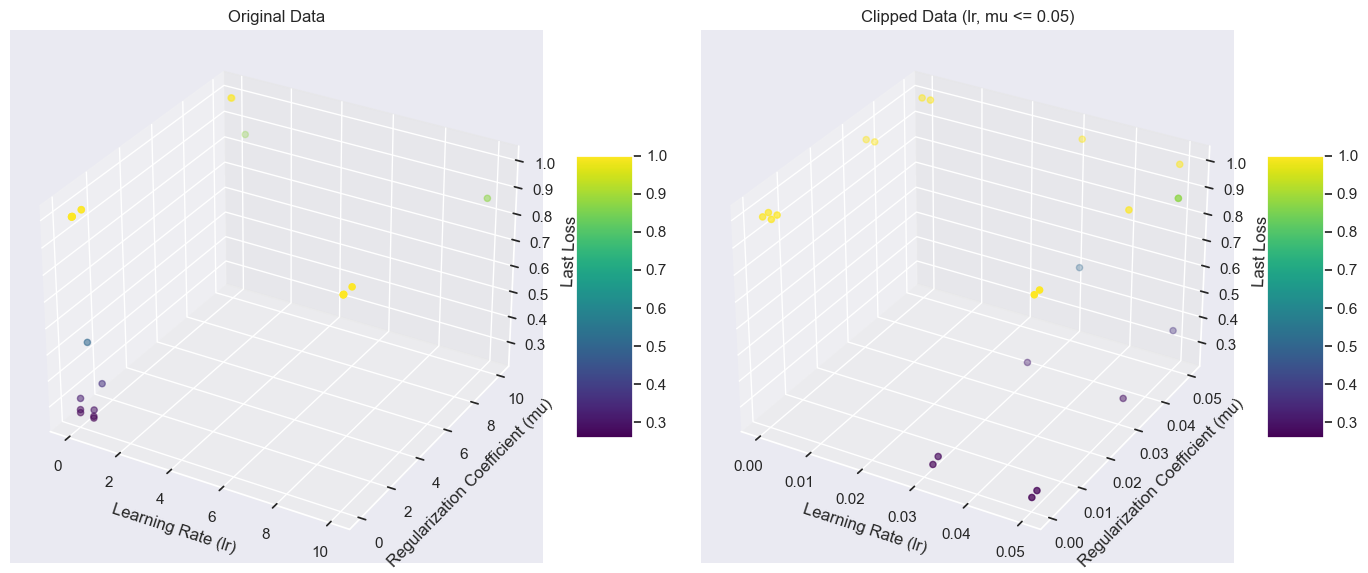

In [113]:
plot_3d_loss_mu_lr(adam_mu_and_lr_loss)

In [114]:
adam_mu_lr = 0.56234
adam_mu = 0.00010
iter_count = 500

In [115]:

adam_mu_r2_train, adam_mu_r2_val, adam_mu_last_train_loss, adam_mu_val_loss, adam_mu_loss_history = get_train_result(lr=adam_mu_lr, descent_name='adam', descent_reg=True, mu=adam_mu, max_iter=iter_count, min_loss=0.257)

1.8975599673859986
9.730413162576554
9.386339524618489
3.946078883648017
1.720844306769457
3.7635676480692357
5.380103034344278
4.070877992790013
1.6875424300783302
0.8041789279711049
1.912749519026873
3.265595264582567
3.1591568632278104
1.7598469742127614
0.509308414799014
0.47393492486422223
1.364904724456786
2.021266524124837
1.7476393372780523
0.9231190519299396
0.39535005379867855
0.5474188396435988
0.9951184340167131
1.134668876070017
0.8337277391579424
0.47516190862551905
0.4347181253647305
0.6586315610933222
0.7919570847364023
0.6430256263477144
0.3890863428472683
0.3165450409368032
0.46577466494399855
0.6088817387923031
0.5531942465206261
0.3674719902231278
0.26602304270558474
0.3350743640597602
0.44917293917773543
0.45395919315511213
0.3554251049824442
0.28217050964792484
0.3048541918240689
0.36069805672298794
0.3603427761486544
0.3088537440312668
0.28029783546793713
0.3044121993715187
0.3321164687399215
0.3158277532395459
0.27716519715327426
0.26820542713458456
0.2938575896

In [116]:
# Печать параметров для градиентного спуска с Adam и регуляризацией
print_params(adam_mu_lr, adam_mu_last_train_loss, adam_mu_val_loss, 
             adam_mu_r2_train, adam_mu_r2_val, iter_count=len(adam_mu_loss_history), 
             mu=adam_mu)

# Печать параметров для градиентного спуска с Adam без регуляризации
print_params(adam_lr, adam_last_train_loss, adam_val_loss, 
             adam_r2_train, adam_r2_val, iter_count=len(adam_loss_history))

Параметры:
lambda_ = 0.56234 
Ошибка на тренировочной выборке = 0.2584493961848697 
Ошибка на валидационной выборке = 0.2604541618239757 
R2_train = 0.7879867258324087 
R2_val = 0.7903435200815666 
Iter_count = 500
mu = 0.0001 

Параметры:
lambda_ = 0.56234 
Ошибка на тренировочной выборке = 0.25962429406330295 
Ошибка на валидационной выборке = 0.2624620487648847 
R2_train = 0.7870229242151628 
R2_val = 0.788727241404516 
Iter_count = 58



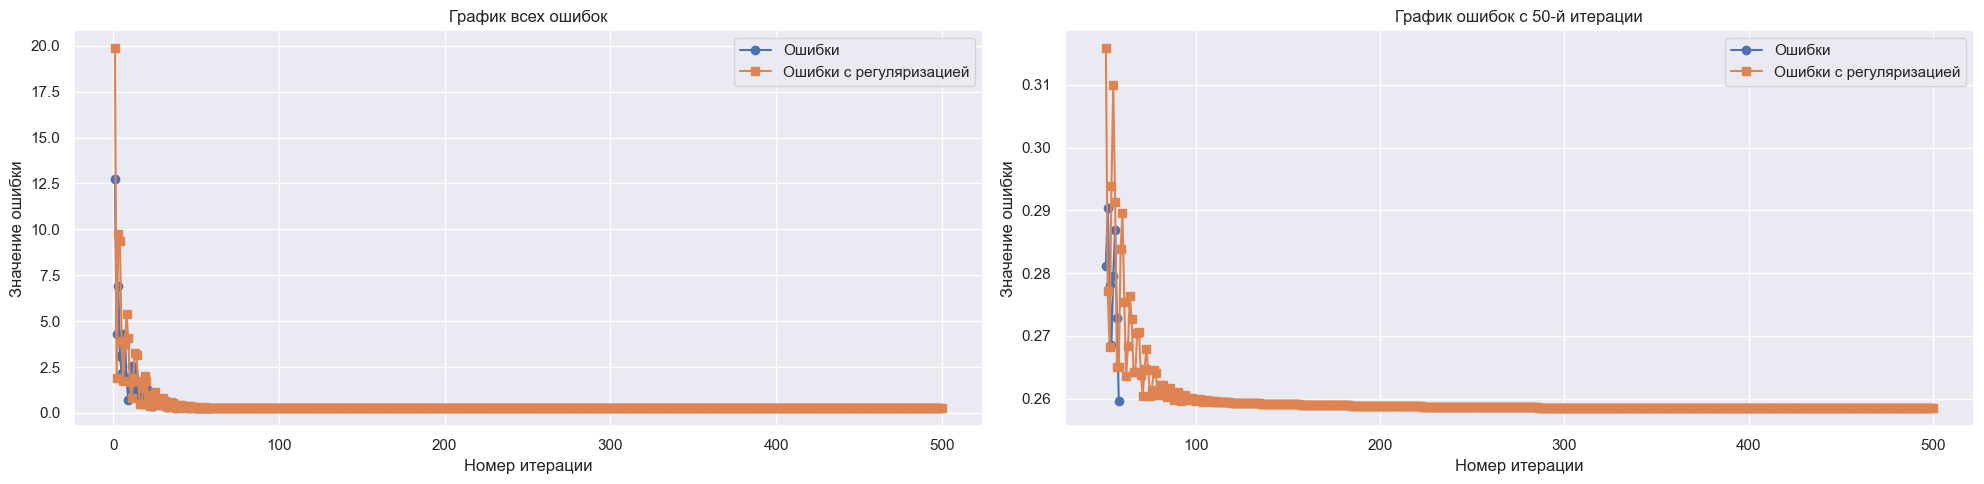

In [117]:
plot_error_lines(adam_loss_history, adam_mu_loss_history, 50)

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

Давайте найдем производную функции потерь $L(y, a)$ по $a$, используя данную формулу:
$$
    L(y, a)
    =
    \log(\cosh(a - y)).
$$

Шаги дифференцирования:

1. **Найдем внешнюю производную** функции относительно $a$, используя цепное правило. Внешняя функция здесь — это $\log(z)$, где $z = \cosh(a - y)$. Производная $\log(z)$ по $z$ равна $\frac{1}{z}$.
   
   Таким образом, внешняя производная будет:
   $$
   \frac{d}{dz} \log(z) = \frac{1}{z} = \frac{1}{\cosh(a - y)}.
   $$

2. **Найдем внутреннюю производную** функции относительно $a$. Внутренняя функция здесь — это $\cosh(a - y)$, где $a - y$ является аргументом функции косинуса гиперболического.

   Производная $\cosh(x)$ по $x$ равна $\sinh(x)$. Поэтому, производная $\cosh(a - y)$ по $a$ равна $\sinh(a - y)$.

3. **Применим цепное правило**, умножив внешнюю производную на внутреннюю. Итак, производная $L(y, a)$ по $a$ равна:
   $$
   \frac{dL}{da} = \frac{1}{\cosh(a - y)} \cdot \sinh(a - y).
   $$

4. **Упрощение выражения**. Данное выражение уже достаточно простое и представляет собой итоговую производную функции потерь по $a$.

Итак, производная функции потерь $L(y, a)$ по $a$ равна:
$$
\frac{dL}{da} = \frac{\sinh(a - y)}{\cosh(a - y)}.
$$

Это выражение также можно упростить, зная, что $\frac{\sinh(x)}{\cosh(x)} = \tanh(x)$, получим:
$$
\frac{dL}{da} = \tanh(a - y).
$$

Это окончательный результат дифференцирования заданной функции потерь.

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [118]:
adam_logcosh_r2_train, adam_logcosh_r2_val, adam_logcosh_last_train_loss, adam_logcosh_val_loss, adam_logcosh_loss_history = get_train_result(loss_function=LossFunction.LogCosh, 
                                                                                                                     lr=adam_mu_lr, descent_name='adam')

0.48388706356532835
2.5725957508841883
2.723274118424444
1.4788341459514673
0.4602739362105804
1.177988561776252
1.5384350969219416
1.0639165637527241
0.4559112682682419
0.5662879034046625
0.9624284108257427
0.8676183158864295
0.3913303246064104
0.24396127626246614
0.593518932532369
0.6952142935847332
0.39625977195444473
0.147624785946358
0.34251212081841426
0.5014061146827317
0.35750375498779297
0.1603187451638818
0.22358927785444538
0.3452763763458689
0.28150143824727564
0.1596059091226674
0.1914192780055299
0.2590971157738809
0.1986805155891845
0.14524863269434138
0.19002596750021247
0.2085073280703203
0.14266755165354367
0.12791967300609114
0.18151433337483563
0.17435230856402856
0.11311536140126022
0.1254302914510027
0.16694325561799597
0.14113214103057364
0.10419522911363764
0.12925798374810613
0.14394469166942161
0.11625274217770956
0.11137362228533648
0.12911484531367945
0.11879068818087582
0.10722814129057348
0.11968501546173602
0.11817331089780829
0.10472981292902589
0.112149

In [119]:
# Печать параметров для градиентного спуска с Adam с функцией потель LogCosh
print_params(adam_mu_lr, adam_logcosh_last_train_loss, adam_logcosh_val_loss, 
             adam_logcosh_r2_train, adam_logcosh_r2_val, iter_count=len(adam_logcosh_loss_history))

Параметры:
lambda_ = 0.56234 
Ошибка на тренировочной выборке = 0.1015043090160594 
Ошибка на валидационной выборке = 0.10237085079697099 
R2_train = 0.7805475210883485 
R2_val = 0.7826601510417068 
Iter_count = 500



In [120]:
# Печать параметров для градиентного спуска с Adam
print_params(adam_lr, adam_last_train_loss, adam_val_loss, 
             adam_r2_train, adam_r2_val, iter_count=len(adam_loss_history))

Параметры:
lambda_ = 0.56234 
Ошибка на тренировочной выборке = 0.25962429406330295 
Ошибка на валидационной выборке = 0.2624620487648847 
R2_train = 0.7870229242151628 
R2_val = 0.788727241404516 
Iter_count = 58



In [121]:
momentum_logcosh_r2_train, momentum_logcosh_r2_val, momentum_logcosh_last_train_loss, momentum_logcosh_val_loss, momentum_logcosh_loss_history = get_train_result(
    loss_function=LossFunction.LogCosh, lr=momentum_mu_lr, descent_name='momentum')

3.358982975568469
3.1078613487265647
2.7547433421552014
2.3203975698447086
1.837075948887364
1.3571604965175392
0.9523837816902788
0.6904236765368272
0.6024017440571112
0.6678693401646891
0.8238129282621808
0.9947814030654307
1.1220071042009743
1.1735985010501508
1.1404078871262529
1.0291451335055968
0.8586534744773919
0.6593568708981575
0.4724072294569789
0.34203527855778515
0.29696863085227815
0.33184895702114725
0.41000285111689705
0.4870957509965057
0.5316310665593702
0.5306399187157125
0.48704538908206246
0.4155627374792518
0.33820193077012617
0.2776599050951184
0.24865077692935197
0.2517567371422783
0.27493737742073127
0.3013286730634069
0.3170781104847665
0.31535842648894025
0.2968185122046391
0.26794946115903107
0.23821838849701907
0.21644423974920862
0.20741418706254242
0.21032108853239595
0.2199054800818236
0.22942735285873136
0.23361524143310716
0.2303142467565496
0.2206194318446197
0.20787511287461516
0.1960741047511127
0.18824274029965116
0.1854032467181838
0.1864930333037

In [122]:
print_params(momentum_mu_lr, momentum_logcosh_last_train_loss, momentum_logcosh_val_loss, 
             momentum_logcosh_r2_train, momentum_logcosh_r2_val, iter_count=len(momentum_logcosh_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.1150478495272918 
Ошибка на валидационной выборке = 0.11599990399969692 
R2_train = 0.7485407195484328 
R2_val = 0.7500834974180542 
Iter_count = 500



In [123]:
print_params(momentum_lr, momentum_last_train_loss, momentum_val_loss, 
             momentum_r2_train, momentum_r2_val, iter_count=len(momentum_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.2662088718566899 
Ошибка на валидационной выборке = 0.2676161678500146 
R2_train = 0.7816214107367231 
R2_val = 0.7845783560232985 
Iter_count = 1500



In [124]:
stochastic_logcosh_r2_train, stochastic_logcosh_r2_val, stochastic_logcosh_last_train_loss, stochastic_logcosh_val_loss, stochastic_logcosh_loss_history = get_train_result(
    loss_function=LossFunction.LogCosh, lr=stochastic_mu_lr, batch_size=batch_size,  descent_name='stochastic')

3.514457972908146
3.3822758263065347
3.2497829282464816
3.1170187941791743
2.992051800888953
2.8592785827053424
2.732912625313851
2.5982296925949373
2.477215087429485
2.351954510327077
2.231215665505664
2.111284316786261
2.00049586660712
1.9102411438159392
1.8177325168878724
1.731429220345479
1.6710443074193904
1.5869259875916788
1.4891704992590904
1.406953965602253
1.3239304673504328
1.2615004956876072
1.1883107842730265
1.126860806528496
1.0744006435149063
1.0134862139625012
0.9766730727624828
0.9395908660201423
0.890699778751074
0.8562470489159786
0.8314802214349418
0.7962513070906184
0.7518511787324982
0.7242669384612469
0.7097034169533253
0.6854256485143188
0.658626884128629
0.6495276485903707
0.6257589739941299
0.6064414945387729
0.6024659434116456
0.5889671620700021
0.5653616816130492
0.5501312304224588
0.5464416221368867
0.5248572157923949
0.48778078052016144
0.4843850174556338
0.4833818106899097
0.4743147866929012
0.462457229793979
0.440198241360926
0.43449950537319537
0.42792

In [125]:
print_params(stochastic_mu_lr, stochastic_logcosh_last_train_loss, stochastic_logcosh_val_loss, 
             stochastic_logcosh_r2_train, stochastic_logcosh_r2_val, iter_count=len(stochastic_logcosh_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.15415078509771216 
Ошибка на валидационной выборке = 0.15539791960266094 
R2_train = 0.6632225163257055 
R2_val = 0.6661712857846549 
Iter_count = 500



In [126]:
print_params(stochastic_lr, stochastic_last_train_loss, stochastic_val_loss, stochastic_r2_train, stochastic_r2_val, iter_count=len(stochastic_loss_history), batch_sizes=batch_size)

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.3121472042966535 
Ошибка на валидационной выборке = 0.3118118318148478 
R2_train = 0.7439369107372369 
R2_val = 0.7490023941356666 
Iter_count = 1500
Batch_size = 10 



In [127]:
full_logcosh_r2_train, full_logcosh_r2_val, full_logcosh_last_train_loss, full_logcosh_val_loss, full_logcosh_loss_history = get_train_result(
    loss_function=LossFunction.LogCosh, lr=full_mu_lr, descent_name='full')

3.374710403083172
3.2428786252880104
3.1121412960589243
2.982723018568045
2.8548773339103515
2.728884992127462
2.605050427896064
2.4836963209549827
2.365156297039728
2.2497660250866924
2.137853164641133
2.0297267863023443
1.925666999112538
1.8259155464008663
1.7306680629623648
1.6400685297821813
1.5542062448884042
1.4731153861002602
1.3967770082578357
1.3251231230367024
1.2580423746827654
1.1953867605831188
1.1369788500788602
1.0826190157620088
1.0320922889944442
0.985174564230686
0.9416379867902572
0.9012554537382763
0.8638042314372509
0.829068745074327
0.7968426272161683
0.7669301279644023
0.7391469927682881
0.7133209093025273
0.6892916153003568
0.6669107473450681
0.6460414981257265
0.6265581376772066
0.6083454432777164
0.5912980732452816
0.5753199119098991
0.5603234064624335
0.5462289110520633
0.5329640492532763
0.5204631026803691
0.5086664309314354
0.49751992605074363
0.48697450318420177
0.47698562796418786
0.46751288031443167
0.45851955374758296
0.449972288787067
0.441840738841805

In [128]:
def plot_comparison_errors(full_errors, stochastic_errors, momentum_errors, adam_errors, start_val: int = 50):
    """
    Функция для отображения четырех линий ошибок на графике, представляющих различные
    методы оптимизации (полный градиентный спуск, стохастический градиентный спуск, 
    градиентный спуск с моментумом и Adam), а также второго графика с данными начиная
    с указанной итерации.

    Параметры:
    - full_errors: Список значений ошибок для полного градиентного спуска.
    - stochastic_errors: Список значений ошибок для стохастического градиентного спуска.
    - momentum_errors: Список значений ошибок для градиентного спуска с моментумом.
    - adam_errors: Список значений ошибок для оптимизатора Adam.
    - start_val: Итерация, с которой начинается второй график.
    """
    
    # Создаем фигуру и два подграфика (subplots)
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    
    # Первый подграфик для всех данных
    axs[0].plot(range(1, len(full_errors) + 1), full_errors, label='Full Gradient Descent', marker='o')
    axs[0].plot(range(1, len(stochastic_errors) + 1), stochastic_errors, label='Stochastic Gradient Descent', marker='s')
    axs[0].plot(range(1, len(momentum_errors) + 1), momentum_errors, label='Momentum Gradient Descent', marker='^')
    axs[0].plot(range(1, len(adam_errors) + 1), adam_errors, label='Adam Optimizer', marker='x')
    axs[0].set_title('Comparison of Error Rates Across Methods')
    axs[0].set_xlabel('Iteration Number')
    axs[0].set_ylabel('Error Value')
    axs[0].legend()

    # Второй подграфик с указанной итерации
    axs[1].plot(range(start_val + 1, len(full_errors) + 1), full_errors[start_val:], label='Full Gradient Descent', marker='o')
    axs[1].plot(range(start_val + 1, len(stochastic_errors) + 1), stochastic_errors[start_val:], label='Stochastic Gradient Descent', marker='s')
    axs[1].plot(range(start_val + 1, len(momentum_errors) + 1), momentum_errors[start_val:], label='Momentum Gradient Descent', marker='^')
    axs[1].plot(range(start_val + 1, len(adam_errors) + 1), adam_errors[start_val:], label='Adam Optimizer', marker='x')
    axs[1].set_title('Comparison from the {}-th Iteration Onwards'.format(start_val))
    axs[1].set_xlabel('Iteration Number')
    axs[1].set_ylabel('Error Value')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

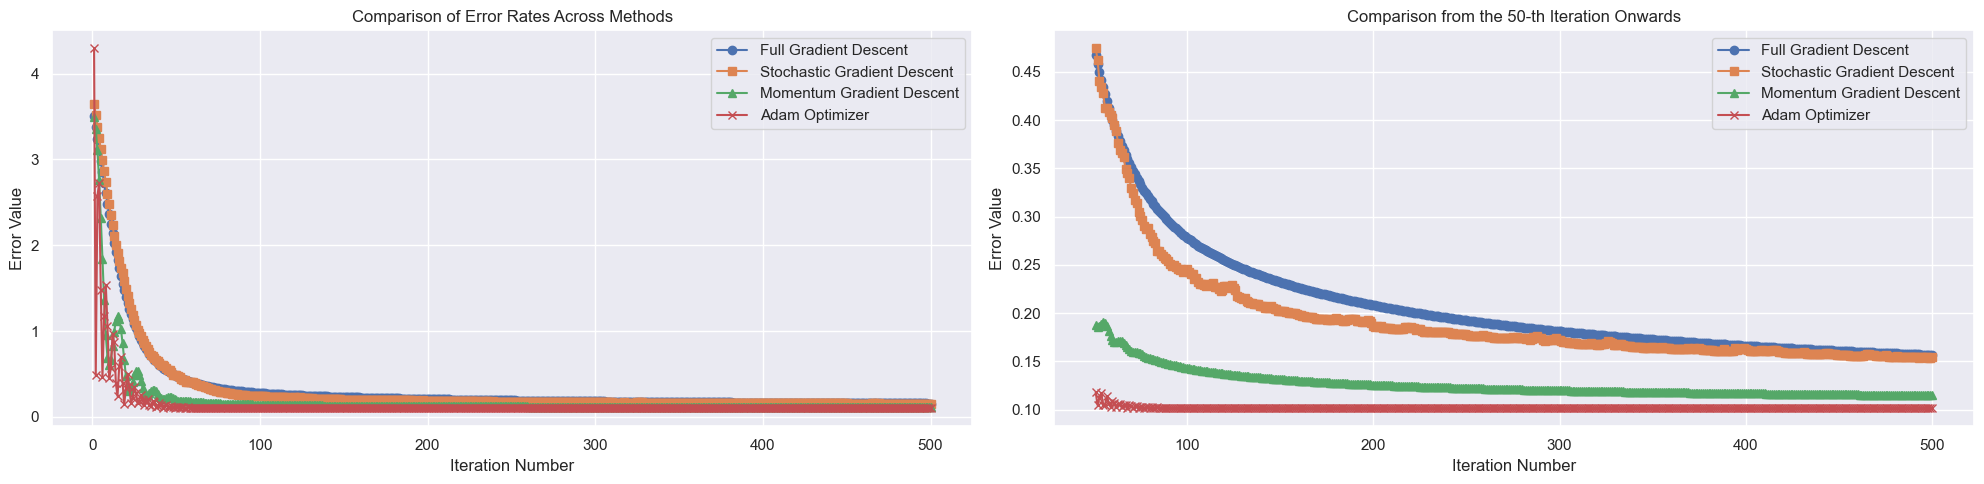

In [129]:
plot_comparison_errors(full_logcosh_loss_history, stochastic_logcosh_loss_history, momentum_logcosh_loss_history, adam_logcosh_loss_history, 50)

In [130]:
plot_comparison_errors(full_loss_history, stochastic_loss_history, momentum_loss_history, adam_loss_history, 50)

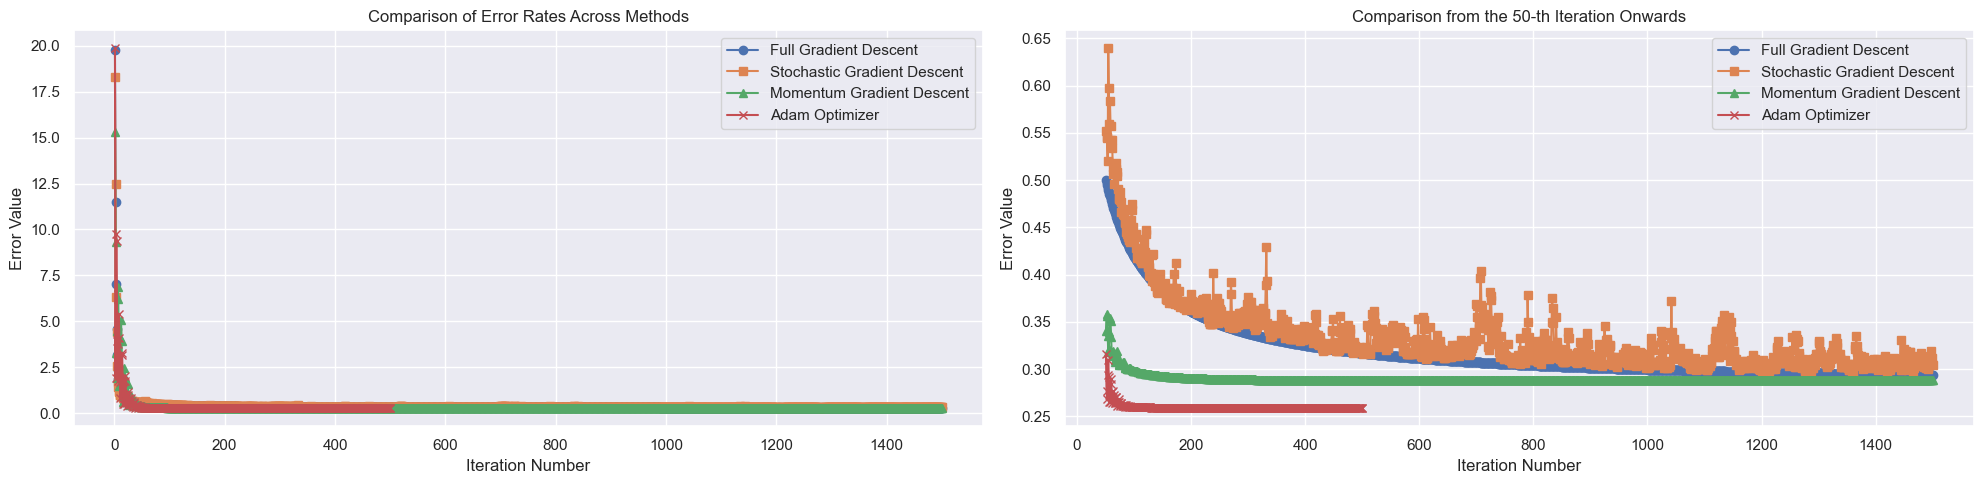

In [131]:
plot_comparison_errors(full_mu_loss_history, stochastic_mu_loss_history, momentum_mu_loss_history, adam_mu_loss_history, 50)